### Zakupoholicy - Część 01 - STATYSTYKA

Data: https://www.kaggle.com/datasets/benpowis/customer-propensity-to-purchase-data


Cel: analiza czy dany klient wykona u nas zakupy czy nie

Stakeholder: właściciel sklepu internetowego starający się zminimalizować ryzyko występowania porzuconego koszyka - przetlumacz mi to na angielski

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import plotly.graph_objects as go


In [2]:
df_train = pd.read_csv('training_sample.csv')

In [3]:
df_test = pd.read_csv('testing_sample.csv')

### Co mamy w tabeli:

<b>UserID - </b>

A unique identifier for the visitor

<b>basket_icon_click - </b>

Did the visitor click on the shopping basket icon?

<b>basket_add_list - </b>

Did the visitor add a product to their shopping cart on the 'list' page?

<b>basket_add_detail - </b>

Did the visitor add a product to their shopping cart on the 'detail' page?

<b>sort_by - </b>

Did the visitor sort products on a page?

<b>image_picker - </b>

Did the visitor use the image picker?

<b>account_page_click - </b>

Did the visitor visit their account page?

<b>promo_banner_click - </b>

Did the visitor click on a promo banner?

<b>detail_wishlist_add - </b>

Did the visitor add a product to their wishlist from the 'detail' page?

<b>list_size_dropdown - </b>

Did the visitor interact with a product dropdown?

<b>closed_minibasket_click - </b>

Did the visitor close their mini shopping basket?

<b>checked_delivery_detail - </b>

Did the visitor view the delivery FAQ area on a product page?

<b>checked_returns_detail - </b>

Did the visitor check the returns FAQ area on a product page?

<b>sign_in - </b>

Did the visitor sign in to the website?

<b>saw_checkout - </b>

Did the visitor view the checkout?

<b>saw_sizecharts - </b>

Did the visitor view a product size chart?

<b>saw_delivery - </b>

Did the visitor view the delivery FAQ page?

<b>saw_account_upgrade - </b>

Did the visitor view the account upgrade page?

<b>saw_homepage - </b>

Did the visitor view the website homepage?

<b>device_mobile - </b>

Was the visitor on a mobile device?

<b>device_computer - </b>

Was the visitor on a desktop device?

<b>device_tablet - </b>

Was the visitor on a table device?

<b>returning_user - </b>

Was the visitor new or returning?

<b>loc_uk - </b>

Was the visitor located in the UK, based on their IP address?

<b>ordered - </b>

Did the customer place an order?

Analiza danych - co mamy w naszych bazach?

In [4]:
df_train.shape

(455401, 25)

In [5]:
df_test.shape

(151655, 25)

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
df_train.head()

,UserID,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,checked_delivery_detail,checked_returns_detail,sign_in,saw_checkout,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
0,a720-6b732349-a720-4862-bd21-644732,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,a0c0-6b73247c-a0c0-4bd9-8baa-797356,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,86a8-6b735c67-86a8-407b-ba24-333055,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
3,6a3d-6b736346-6a3d-4085-934b-396834,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
4,b74a-6b737717-b74a-45c3-8c6a-421140,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,1,1


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455401 entries, 0 to 455400
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   UserID                   455401 non-null  object
 1   basket_icon_click        455401 non-null  int64 
 2   basket_add_list          455401 non-null  int64 
 3   basket_add_detail        455401 non-null  int64 
 4   sort_by                  455401 non-null  int64 
 5   image_picker             455401 non-null  int64 
 6   account_page_click       455401 non-null  int64 
 7   promo_banner_click       455401 non-null  int64 
 8   detail_wishlist_add      455401 non-null  int64 
 9   list_size_dropdown       455401 non-null  int64 
 10  closed_minibasket_click  455401 non-null  int64 
 11  checked_delivery_detail  455401 non-null  int64 
 12  checked_returns_detail   455401 non-null  int64 
 13  sign_in                  455401 non-null  int64 
 14  saw_checkout        

In [9]:
df_train.describe()

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,checked_delivery_detail,checked_returns_detail,sign_in,saw_checkout,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
count,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000
mean,0.099150,0.074521,0.112916,0.036849,0.026735,0.003570,0.016208,0.003511,0.230362,0.017277,0.062874,0.009179,0.088810,0.080085,0.000389,0.005542,0.001096,0.290024,0.680706,0.194220,0.128364,0.534915,0.933224,0.041926
std,0.298864,0.262617,0.316490,0.188391,0.161307,0.059647,0.126274,0.059151,0.421065,0.130302,0.242737,0.095365,0.284469,0.271426,0.019711,0.074241,0.033084,0.453773,0.466204,0.395599,0.334495,0.498780,0.249634,0.200420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151655 entries, 0 to 151654
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   UserID                   151655 non-null  object
 1   basket_icon_click        151655 non-null  int64 
 2   basket_add_list          151655 non-null  int64 
 3   basket_add_detail        151655 non-null  int64 
 4   sort_by                  151655 non-null  int64 
 5   image_picker             151655 non-null  int64 
 6   account_page_click       151655 non-null  int64 
 7   promo_banner_click       151655 non-null  int64 
 8   detail_wishlist_add      151655 non-null  int64 
 9   list_size_dropdown       151655 non-null  int64 
 10  closed_minibasket_click  151655 non-null  int64 
 11  checked_delivery_detail  151655 non-null  int64 
 12  checked_returns_detail   151655 non-null  int64 
 13  sign_in                  151655 non-null  int64 
 14  saw_checkout        

In [11]:
df_test.describe()

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,checked_delivery_detail,checked_returns_detail,sign_in,saw_checkout,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
count,151655.000000,151655.000000,151655.000000,151655.000000,151655.000000,151655.000000,151655.000000,151655.000000,151655.000000,151655.000000,151655.000000,151655.000000,151655.000000,151655.000000,151655.000000,151655.000000,151655.000000,151655.000000,151655.000000,151655.000000,151655.000000,151655.000000,151655.000000,151655.0
mean,0.074228,0.060954,0.085444,0.036438,0.025334,0.003158,0.014177,0.003053,0.215984,0.013412,0.023178,0.008691,0.052151,0.042623,0.000297,0.005097,0.000996,0.285602,0.681448,0.200673,0.120049,0.529267,0.928324,0.0
std,0.262142,0.239247,0.279542,0.187378,0.157137,0.056112,0.118220,0.055170,0.411504,0.115031,0.150468,0.092819,0.222333,0.202006,0.017223,0.071212,0.031539,0.451702,0.465916,0.400505,0.325020,0.499144,0.257951,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.0
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


### UWAGA!!! ZESTAW PODANY JAKO TESTOWY MA ILOŚĆ ZAMÓWIEŃ 0 !!!!!


Do projektu wydzielimy zestaw testowy z pakietu treningowego podanego na Kaggle. 


Nie bierzemy pod uwage danych z zestawy testowego KAGGLE

### UWAGA! ZMIENIAMY NAZWY KOLUMN NA JEZYK POLSKI!

Zeby zachowac jednolitosc językową prezentacji - zmieniamy język na polski.

training_sample_pl.csv

Jest to wykonane w arkuszu: 

Customer propensity to purchase_cleaning_data_2.ipynb

In [12]:
df_all = pd.read_csv('training_sample_pl.csv')

Tłumaczenie kolumn:

    'UserID': 'ID_uzytkownika',

    'basket_icon_click': 'klik_ikony_koszyka',

    'basket_add_list': 'dodanie_do_koszyka_z_listy',

    'basket_add_detail': 'dodanie_do_koszyka_z_detali',

    'sort_by': 'sortowanie_produktu',

    'image_picker': 'wybor_obrazu',

    'account_page_click': 'klik_na_strone_konta',

    'promo_banner_click': 'klik_na_baner_promo',

    'detail_wishlist_add': 'dodanie_do_listy_zyczen_z_detali',

    'list_size_dropdown': 'rozwijana_lista_produktu',

    'closed_minibasket_click': 'zamkniecie_mini_koszyka',

    'checked_delivery_detail': 'sprawdzenie_info_dostawy_produkt',

    'checked_returns_detail': 'sprawdzenie_info_zwrotu',

    'sign_in': 'logowanie',

    'saw_checkout': 'wyswietlenie_realizacji_zamowienia',

    'saw_sizecharts': 'wyswietlenie_tabeli_rozmiarow',

    'saw_delivery': 'wyswietlenie_info_o_dostawie_FAQ',

    'saw_account_upgrade': 'wyswietlenie_opcji_upgrade_konta',

    'saw_homepage': 'wyswietlenie_strony_glownej',

    'device_mobile': 'urzadzenie_mobilne', 

    'device_computer': 'komputer', 

    'device_tablet': 'tablet',

    'returning_user': 'powracajcy_klient', 

    'loc_uk': 'lokalizacja_uk',
    
    'ordered': 'zlozone_zamownie'

In [13]:
df_all.describe()

,klik_ikony_koszyka,dodanie_do_koszyka_z_listy,dodanie_do_koszyka_z_detali,sortowanie_produktu,wybor_obrazu,klik_na_strone_konta,klik_na_baner_promo,dodanie_do_listy_zyczen_z_detali,rozwijana_lista_produktu,zamkniecie_mini_koszyka,sprawdzenie_info_dostawy_produkt,sprawdzenie_info_zwrotu,logowanie,wyswietlenie_realizacji_zamowienia,wyswietlenie_tabeli_rozmiarow,wyswietlenie_info_o_dostawie_FAQ,wyswietlenie_opcji_upgrade_konta,wyswietlenie_strony_glownej,urzadzenie_mobilne,komputer,tablet,powracajcy_klient,lokalizacja_uk,zlozone_zamowienie
count,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000
mean,0.099150,0.074521,0.112916,0.036849,0.026735,0.003570,0.016208,0.003511,0.230362,0.017277,0.062874,0.009179,0.088810,0.080085,0.000389,0.005542,0.001096,0.290024,0.680706,0.194220,0.128364,0.534915,0.933224,0.041926
std,0.298864,0.262617,0.316490,0.188391,0.161307,0.059647,0.126274,0.059151,0.421065,0.130302,0.242737,0.095365,0.284469,0.271426,0.019711,0.074241,0.033084,0.453773,0.466204,0.395599,0.334495,0.498780,0.249634,0.200420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
df_all.columns

Index(['ID_uzytkownika', 'klik_ikony_koszyka', 'dodanie_do_koszyka_z_listy',
       'dodanie_do_koszyka_z_detali', 'sortowanie_produktu', 'wybor_obrazu',
       'klik_na_strone_konta', 'klik_na_baner_promo',
       'dodanie_do_listy_zyczen_z_detali', 'rozwijana_lista_produktu',
       'zamkniecie_mini_koszyka', 'sprawdzenie_info_dostawy_produkt',
       'sprawdzenie_info_zwrotu', 'logowanie',
       'wyswietlenie_realizacji_zamowienia', 'wyswietlenie_tabeli_rozmiarow',
       'wyswietlenie_info_o_dostawie_FAQ', 'wyswietlenie_opcji_upgrade_konta',
       'wyswietlenie_strony_glownej', 'urzadzenie_mobilne', 'komputer',
       'tablet', 'powracajcy_klient', 'lokalizacja_uk', 'zlozone_zamowienie'],
      dtype='object')

In [15]:
cols = ['ID_uzytkownika', 'klik_ikony_koszyka', 'dodanie_do_koszyka_z_listy',
       'dodanie_do_koszyka_z_detali', 'sortowanie_produktu', 'wybor_obrazu',
       'klik_na_strone_konta', 'klik_na_baner_promo',
       'dodanie_do_listy_zyczen_z_detali', 'rozwijana_lista_produktu',
       'zamkniecie_mini_koszyka', 'sprawdzenie_info_dostawy_produkt',
       'sprawdzenie_info_zwrotu', 'logowanie',
       'wyswietlenie_realizacji_zamowienia', 'wyswietlenie_tabeli_rozmiarow',
       'wyswietlenie_info_o_dostawie_FAQ', 'wyswietlenie_opcji_upgrade_konta',
       'wyswietlenie_strony_glownej', 'urzadzenie_mobilne', 'komputer',
       'tablet', 'powracajcy_klient', 'lokalizacja_uk', 'zlozone_zamowienie']

In [16]:
for i in cols:
    print(f'Liczba kategorii zmiennej {i}: \n {df_all[i].value_counts()}')

Liczba kategorii zmiennej ID_uzytkownika: 
 ID_uzytkownika
a720-6b732349-a720-4862-bd21-644732    1
22d3-59b23c76-22d3-4074-a767-183814    1
4c88-59b3d7a2-4c88-4c62-96b0-32243     1
7739-59b3c969-7739-4c7a-80cd-94167     1
0477-59b39376-0477-4b56-843d-931365    1
                                      ..
074a-ac239517-074a-46a4-ab7c-192772    1
7819-ac2356dc-7819-4bb0-83aa-398482    1
0418-ac235007-0418-4b0b-a8b4-96811     1
8468-ac22c648-8468-b164-8707-727029    1
7aav-06d7bd20-7aav-411b-bc9c-325055    1
Name: count, Length: 455401, dtype: int64
Liczba kategorii zmiennej klik_ikony_koszyka: 
 klik_ikony_koszyka
0    410248
1     45153
Name: count, dtype: int64
Liczba kategorii zmiennej dodanie_do_koszyka_z_listy: 
 dodanie_do_koszyka_z_listy
0    421464
1     33937
Name: count, dtype: int64
Liczba kategorii zmiennej dodanie_do_koszyka_z_detali: 
 dodanie_do_koszyka_z_detali
0    403979
1     51422
Name: count, dtype: int64
Liczba kategorii zmiennej sortowanie_produktu: 
 sortowanie_pro

In [17]:
# Calculating correlation matrix
corr = df_all.corr(method = 'spearman', numeric_only=True)

# Defining custom color palette with more colors
colors = ['#08306b', '#08519c', '#2171b5', '#4292c6', '#6baed6', '#9ecae1', 
          '#c6dbef', '#deebf7', '#fee0d2', '#fcbba1', '#fc9272', '#fb6a4a', 
          '#ef3b2c', '#cb181d', '#a50f15', '#67000d']

cmap = ListedColormap(colors)

# Apply color gradient to correlation matrix
corr.style.background_gradient(cmap=cmap, vmin=-1, vmax=1)

,klik_ikony_koszyka,dodanie_do_koszyka_z_listy,dodanie_do_koszyka_z_detali,sortowanie_produktu,wybor_obrazu,klik_na_strone_konta,klik_na_baner_promo,dodanie_do_listy_zyczen_z_detali,rozwijana_lista_produktu,zamkniecie_mini_koszyka,sprawdzenie_info_dostawy_produkt,sprawdzenie_info_zwrotu,logowanie,wyswietlenie_realizacji_zamowienia,wyswietlenie_tabeli_rozmiarow,wyswietlenie_info_o_dostawie_FAQ,wyswietlenie_opcji_upgrade_konta,wyswietlenie_strony_glownej,urzadzenie_mobilne,komputer,tablet,powracajcy_klient,lokalizacja_uk,zlozone_zamowienie
klik_ikony_koszyka,1.000000,0.466671,0.529947,0.073016,0.082893,0.057253,0.109342,0.044153,0.291608,0.323940,0.405787,0.067149,0.478834,0.458774,0.008741,0.052922,0.030764,0.203087,0.016203,-0.001757,-0.006019,0.126640,0.018518,0.428334
dodanie_do_koszyka_z_listy,0.466671,1.000000,0.340968,0.106852,0.061462,0.028994,0.096608,0.019061,0.469625,0.208082,0.264766,0.030469,0.312276,0.297681,0.004161,0.030286,0.018150,0.180221,-0.017202,0.016629,0.015516,0.057443,0.018797,0.287666
dodanie_do_koszyka_z_detali,0.529947,0.340968,1.000000,0.085854,0.124230,0.037502,0.109043,0.050724,0.247205,0.222444,0.404134,0.090434,0.461659,0.456713,0.008101,0.048410,0.024255,0.175138,-0.018800,0.032794,-0.001799,0.057680,0.030956,0.414420
sortowanie_produktu,0.073016,0.106852,0.085854,1.000000,0.185661,-0.009754,0.058155,0.024056,0.124273,0.028453,0.059635,0.022364,0.058662,0.055959,0.006196,0.028102,0.012194,0.128205,-0.278043,0.269589,0.078088,0.010366,-0.051148,0.054636
wybor_obrazu,0.082893,0.061462,0.124230,0.185661,1.000000,-0.007182,0.046968,0.039412,0.074726,0.024515,0.091777,0.065699,0.074353,0.071116,0.005710,0.031267,0.008912,0.074698,-0.235542,0.241681,0.050471,0.002085,-0.041662,0.071492
klik_na_strone_konta,0.057253,0.028994,0.037502,-0.009754,-0.007182,1.000000,0.014474,0.013251,0.016912,0.033595,0.065939,0.032842,0.187988,0.081079,0.008158,0.048095,0.026949,0.073538,0.038549,-0.025294,-0.017028,0.016550,-0.001389,0.057279
klik_na_baner_promo,0.109342,0.096608,0.109043,0.058155,0.046968,0.014474,1.000000,0.031775,0.097991,0.056917,0.064328,0.027398,0.073081,0.067201,0.000998,0.024616,0.017825,0.073477,-0.032351,0.035099,0.007879,0.019168,-0.018817,0.056533
dodanie_do_listy_zyczen_z_detali,0.044153,0.019061,0.050724,0.024056,0.039412,0.013251,0.031775,1.000000,0.038497,0.030591,0.039069,0.028153,0.130368,0.052786,0.000713,0.013570,0.008133,0.033563,-0.009750,0.014493,0.002081,0.013149,-0.010889,0.023516
rozwijana_lista_produktu,0.291608,0.469625,0.247205,0.124273,0.074726,0.016912,0.097991,0.038497,1.000000,0.140700,0.151981,0.029097,0.170406,0.159885,0.001118,0.028138,0.015929,0.235547,-0.008991,-0.012537,0.036213,0.100140,-0.002313,0.154867
zamkniecie_mini_koszyka,0.323940,0.208082,0.222444,0.028453,0.024515,0.033595,0.056917,0.030591,0.140700,1.000000,0.130958,0.026292,0.153448,0.148010,0.005080,0.021881,0.012418,0.077102,-0.000571,-0.028121,0.040407,0.052852,0.015351,0.140011


In [18]:
corr_matrix = df_all.corr(method = 'spearman', numeric_only=True)
# Filter and print correlation values greater than 0.5 or less than -0.5
print("Wartosci korelacji większe od 0.5 lub mniejsze od -0.5:")
for col in corr_matrix.columns:
    for idx in corr_matrix.index:
        corr_value = corr_matrix.loc[idx, col]
        if (corr_value > 0.5 or corr_value < -0.5) and corr_value != 1:
            print(f"Korelacja pomiędzy '{idx}' i '{col}': {corr_value}")

Wartosci korelacji większe od 0.5 lub mniejsze od -0.5:
Korelacja pomiędzy 'dodanie_do_koszyka_z_detali' i 'klik_ikony_koszyka': 0.529946585332848
Korelacja pomiędzy 'klik_ikony_koszyka' i 'dodanie_do_koszyka_z_detali': 0.529946585332848
Korelacja pomiędzy 'logowanie' i 'sprawdzenie_info_dostawy_produkt': 0.6217381664807214
Korelacja pomiędzy 'wyswietlenie_realizacji_zamowienia' i 'sprawdzenie_info_dostawy_produkt': 0.6531088430144159
Korelacja pomiędzy 'zlozone_zamowienie' i 'sprawdzenie_info_dostawy_produkt': 0.7987204780500118
Korelacja pomiędzy 'sprawdzenie_info_dostawy_produkt' i 'logowanie': 0.6217381664807214
Korelacja pomiędzy 'wyswietlenie_realizacji_zamowienia' i 'logowanie': 0.930026752982124
Korelacja pomiędzy 'zlozone_zamowienie' i 'logowanie': 0.6655557350054808
Korelacja pomiędzy 'sprawdzenie_info_dostawy_produkt' i 'wyswietlenie_realizacji_zamowienia': 0.6531088430144159
Korelacja pomiędzy 'logowanie' i 'wyswietlenie_realizacji_zamowienia': 0.930026752982124
Korelacja p

In [19]:
df_cust_id = df_all.groupby(['ID_uzytkownika'])['ID_uzytkownika'].value_counts().reset_index(name='Suma')
df_cust_id 

,ID_uzytkownika,Suma
0,#NAME?,1
1,-232085,1
2,-6ALS7-973665,1
3,0000-097d7b76-0000-43ca-8b1c-422914,1
4,0000-16dd097d-0000-4a90-ad28-223668,1
...,...,...
455396,dddc-60b21e94-dddc-4cb7-a0d6-568692,1
455397,dddc-d871d062-dddc-46b4-aa47-590935,1
455398,dddd-16303d64-dddd-423c-a796-2336,1
455399,dddd-74b77b02-dddd-41e6-873a-389153,1


In [20]:
df_cust_id.max()

ID_uzytkownika    dddd-av80b36a-dddd-b169-a197-478225
Suma                                                1
dtype: object

Kazdy cutomer ID jest wyjątkowy i nie powtarza się

Sprawdzmy czy sa klienci z nullami

In [21]:
null_values = df_all.isnull()

In [22]:
null_counts = null_values.sum()

In [23]:
print("Null value counts in each column:")
print(null_counts)

Null value counts in each column:
ID_uzytkownika                        0
klik_ikony_koszyka                    0
dodanie_do_koszyka_z_listy            0
dodanie_do_koszyka_z_detali           0
sortowanie_produktu                   0
wybor_obrazu                          0
klik_na_strone_konta                  0
klik_na_baner_promo                   0
dodanie_do_listy_zyczen_z_detali      0
rozwijana_lista_produktu              0
zamkniecie_mini_koszyka               0
sprawdzenie_info_dostawy_produkt      0
sprawdzenie_info_zwrotu               0
logowanie                             0
wyswietlenie_realizacji_zamowienia    0
wyswietlenie_tabeli_rozmiarow         0
wyswietlenie_info_o_dostawie_FAQ      0
wyswietlenie_opcji_upgrade_konta      0
wyswietlenie_strony_glownej           0
urzadzenie_mobilne                    0
komputer                              0
tablet                                0
powracajcy_klient                     0
lokalizacja_uk                        0
zlozon

### Nie ma nulli

In [24]:
cols_noid = ['klik_ikony_koszyka', 'dodanie_do_koszyka_z_listy',
       'dodanie_do_koszyka_z_detali', 'sortowanie_produktu', 'wybor_obrazu',
       'klik_na_strone_konta', 'klik_na_baner_promo',
       'dodanie_do_listy_zyczen_z_detali', 'rozwijana_lista_produktu',
       'zamkniecie_mini_koszyka', 'sprawdzenie_info_dostawy_produkt',
       'sprawdzenie_info_zwrotu', 'logowanie',
       'wyswietlenie_realizacji_zamowienia', 'wyswietlenie_tabeli_rozmiarow',
       'wyswietlenie_info_o_dostawie_FAQ', 'wyswietlenie_opcji_upgrade_konta',
       'wyswietlenie_strony_glownej', 'urzadzenie_mobilne', 'komputer',
       'tablet', 'powracajcy_klient', 'lokalizacja_uk', 'zlozone_zamowienie']

In [25]:
df_noid = df_all[cols_noid].copy()

In [26]:
df_noid

,klik_ikony_koszyka,dodanie_do_koszyka_z_listy,dodanie_do_koszyka_z_detali,sortowanie_produktu,wybor_obrazu,klik_na_strone_konta,klik_na_baner_promo,dodanie_do_listy_zyczen_z_detali,rozwijana_lista_produktu,zamkniecie_mini_koszyka,sprawdzenie_info_dostawy_produkt,sprawdzenie_info_zwrotu,logowanie,wyswietlenie_realizacji_zamowienia,wyswietlenie_tabeli_rozmiarow,wyswietlenie_info_o_dostawie_FAQ,wyswietlenie_opcji_upgrade_konta,wyswietlenie_strony_glownej,urzadzenie_mobilne,komputer,tablet,powracajcy_klient,lokalizacja_uk,zlozone_zamowienie
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
4,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455396,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
455397,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
455398,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
455399,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [27]:
counts_df = pd.DataFrame(index=df_noid.columns, columns=['Tak=1', 'Nie=0'])
counts_df = counts_df.rename_axis('aktywnosc')

# Loop through each column and calculate counts
for col in df_noid.columns:
    counts_df.loc[col, 'Tak=1'] = df_noid[col].sum()
    counts_df.loc[col, 'Nie=0'] = len(df_noid) - df_noid[col].sum()

counts_df

,Tak=1,Nie=0
aktywnosc,,
klik_ikony_koszyka,45153,410248
dodanie_do_koszyka_z_listy,33937,421464
dodanie_do_koszyka_z_detali,51422,403979
sortowanie_produktu,16781,438620
wybor_obrazu,12175,443226
klik_na_strone_konta,1626,453775
klik_na_baner_promo,7381,448020
dodanie_do_listy_zyczen_z_detali,1599,453802
rozwijana_lista_produktu,104907,350494


In [28]:
print(counts_df.index)

Index(['klik_ikony_koszyka', 'dodanie_do_koszyka_z_listy',
       'dodanie_do_koszyka_z_detali', 'sortowanie_produktu', 'wybor_obrazu',
       'klik_na_strone_konta', 'klik_na_baner_promo',
       'dodanie_do_listy_zyczen_z_detali', 'rozwijana_lista_produktu',
       'zamkniecie_mini_koszyka', 'sprawdzenie_info_dostawy_produkt',
       'sprawdzenie_info_zwrotu', 'logowanie',
       'wyswietlenie_realizacji_zamowienia', 'wyswietlenie_tabeli_rozmiarow',
       'wyswietlenie_info_o_dostawie_FAQ', 'wyswietlenie_opcji_upgrade_konta',
       'wyswietlenie_strony_glownej', 'urzadzenie_mobilne', 'komputer',
       'tablet', 'powracajcy_klient', 'lokalizacja_uk', 'zlozone_zamowienie'],
      dtype='object', name='aktywnosc')


In [29]:
print(counts_df.columns)


Index(['Tak=1', 'Nie=0'], dtype='object')


In [30]:
counts_df.reset_index(inplace=True)

In [31]:
print(counts_df.columns)

Index(['aktywnosc', 'Tak=1', 'Nie=0'], dtype='object')


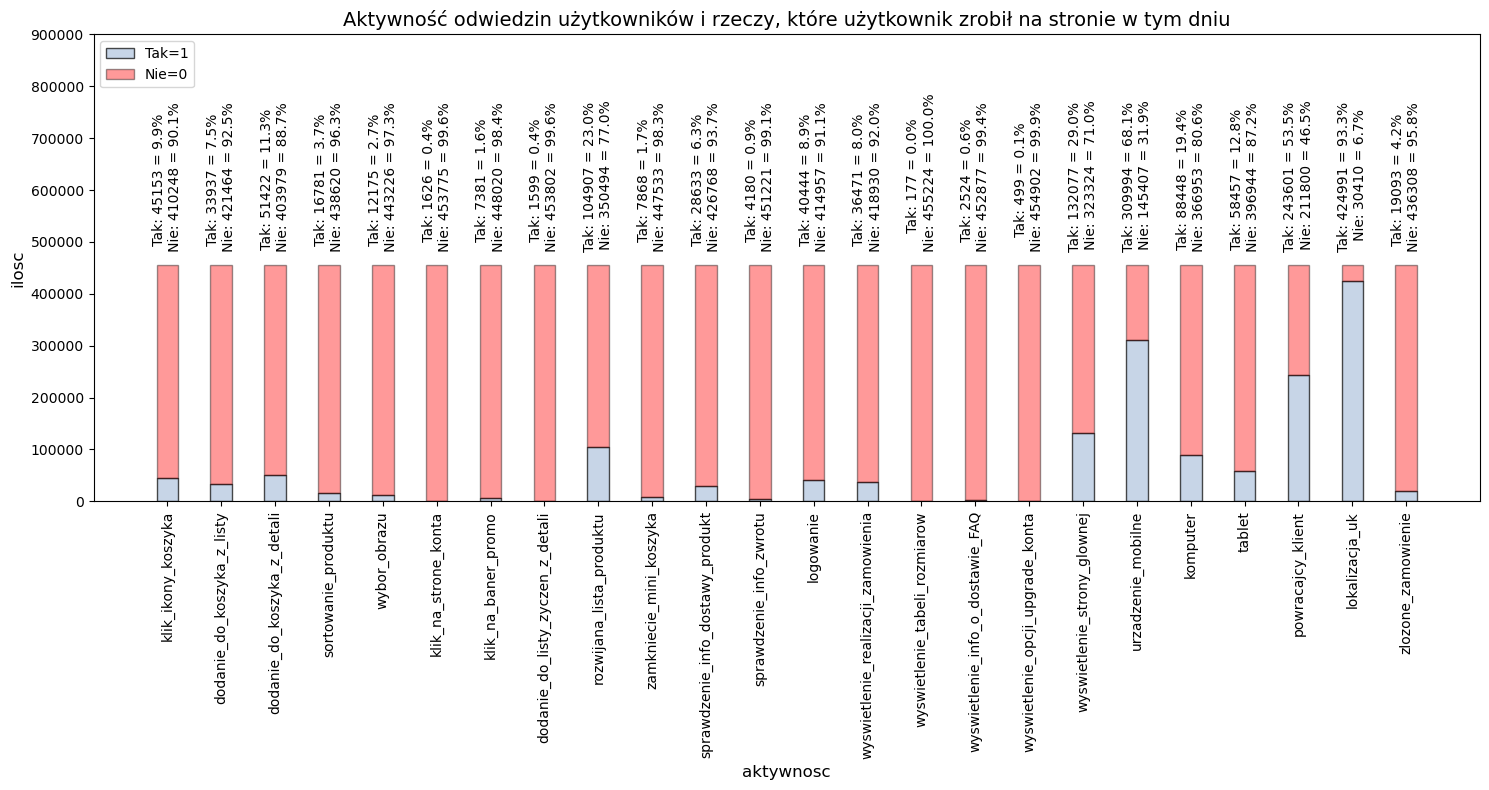

In [32]:

# Plot the bar chart
plt.figure(figsize=(15, 8))  # Adjust the figure size as needed

# Set width of bar
bar_width = 0.4

# Set position of bar on X axis
r = range(len(counts_df))

# Create bars for each feature
plt.bar(r, counts_df["Tak=1"], color='lightsteelblue', alpha=0.7, width=bar_width, edgecolor='black', label='Tak=1')
plt.bar(r, counts_df["Nie=0"], color='r', alpha=0.4, width=bar_width, edgecolor='black', bottom=counts_df["Tak=1"], label='Nie=0')

# Add labels for subcategories
for i, (yes_count, no_count) in enumerate(zip(counts_df["Tak=1"], counts_df["Nie=0"])):
    plt.text(i, yes_count + no_count + 5000, f'   Tak: {yes_count} = {round((yes_count/(no_count+yes_count)*100),1)}% \n   Nie: {no_count} = {round((no_count/(no_count+yes_count)*100),1)}%', ha='center', fontsize=10, rotation=90)

# Add xticks
plt.xlabel('aktywnosc', fontsize=12)
plt.ylabel('ilosc', fontsize=12)
plt.title('Aktywność odwiedzin użytkowników i rzeczy, które użytkownik zrobił na stronie w tym dniu', fontsize=14)
plt.xticks(r, counts_df["aktywnosc"], rotation=90, fontsize=10)
plt.yticks(fontsize=10)

# Add legend
plt.legend(loc='upper left', fontsize=10)
plt.ylim(0, 900000)

# Show plot
plt.tight_layout()
plt.show()

In [33]:
counts_df

,aktywnosc,Tak=1,Nie=0
0,klik_ikony_koszyka,45153,410248
1,dodanie_do_koszyka_z_listy,33937,421464
2,dodanie_do_koszyka_z_detali,51422,403979
3,sortowanie_produktu,16781,438620
4,wybor_obrazu,12175,443226
5,klik_na_strone_konta,1626,453775
6,klik_na_baner_promo,7381,448020
7,dodanie_do_listy_zyczen_z_detali,1599,453802
8,rozwijana_lista_produktu,104907,350494
9,zamkniecie_mini_koszyka,7868,447533


In [34]:
counts_df['Total'] = counts_df['Tak=1'] + counts_df['Nie=0']

counts_df['TakProcent'] = (counts_df['Tak=1'] / counts_df['Total']) * 100

counts_df['NieProcent'] = (counts_df['Nie=0'] / counts_df['Total']) * 100

In [35]:
counts_df

,aktywnosc,Tak=1,Nie=0,Total,TakProcent,NieProcent
0,klik_ikony_koszyka,45153,410248,455401,9.914998,90.085002
1,dodanie_do_koszyka_z_listy,33937,421464,455401,7.452114,92.547886
2,dodanie_do_koszyka_z_detali,51422,403979,455401,11.291587,88.708413
3,sortowanie_produktu,16781,438620,455401,3.684884,96.315116
4,wybor_obrazu,12175,443226,455401,2.673468,97.326532
5,klik_na_strone_konta,1626,453775,455401,0.357048,99.642952
6,klik_na_baner_promo,7381,448020,455401,1.620769,98.379231
7,dodanie_do_listy_zyczen_z_detali,1599,453802,455401,0.351119,99.648881
8,rozwijana_lista_produktu,104907,350494,455401,23.036181,76.963819
9,zamkniecie_mini_koszyka,7868,447533,455401,1.727708,98.272292


### Zbiór mocno niezbalansowany

Mamy tylko 4,2%  zlozonych zamowien.

Jest kilka opcji co zrobic ze zbiorem:

- XGBoost

- zmniejszenie liczby danych

- klasyfikacja

- sztuczne zwiekszenie liczby danych



# KIM JEST OSOBA KUPUJACA?

profil osoby ktora zlozyla zamowienie

In [36]:
df_zam = df_noid.copy()

In [37]:
df_zam = df_zam[(df_zam['zlozone_zamowienie'] == 1)]
df_zam

,klik_ikony_koszyka,dodanie_do_koszyka_z_listy,dodanie_do_koszyka_z_detali,sortowanie_produktu,wybor_obrazu,klik_na_strone_konta,klik_na_baner_promo,dodanie_do_listy_zyczen_z_detali,rozwijana_lista_produktu,zamkniecie_mini_koszyka,sprawdzenie_info_dostawy_produkt,sprawdzenie_info_zwrotu,logowanie,wyswietlenie_realizacji_zamowienia,wyswietlenie_tabeli_rozmiarow,wyswietlenie_info_o_dostawie_FAQ,wyswietlenie_opcji_upgrade_konta,wyswietlenie_strony_glownej,urzadzenie_mobilne,komputer,tablet,powracajcy_klient,lokalizacja_uk,zlozone_zamowienie
4,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,1,1
47,1,1,1,1,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,1,0,0,1,1
56,1,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,1,1
62,1,1,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,1,0,1,1,1
66,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455289,1,1,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,1,0,0,1,1
455307,1,1,1,0,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,0,0,1,1,1
455320,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,1,1,1
455360,1,1,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,1,1


In [38]:
df_zam.reset_index(drop=True)

,klik_ikony_koszyka,dodanie_do_koszyka_z_listy,dodanie_do_koszyka_z_detali,sortowanie_produktu,wybor_obrazu,klik_na_strone_konta,klik_na_baner_promo,dodanie_do_listy_zyczen_z_detali,rozwijana_lista_produktu,zamkniecie_mini_koszyka,sprawdzenie_info_dostawy_produkt,sprawdzenie_info_zwrotu,logowanie,wyswietlenie_realizacji_zamowienia,wyswietlenie_tabeli_rozmiarow,wyswietlenie_info_o_dostawie_FAQ,wyswietlenie_opcji_upgrade_konta,wyswietlenie_strony_glownej,urzadzenie_mobilne,komputer,tablet,powracajcy_klient,lokalizacja_uk,zlozone_zamowienie
0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,1,1
1,1,1,1,1,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,1,0,0,1,1
2,1,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,1,1
3,1,1,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,1,0,1,1,1
4,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19088,1,1,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,1,0,0,1,1
19089,1,1,1,0,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,0,0,1,1,1
19090,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,1,1,1
19091,1,1,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,1,1


In [39]:
df_zam.describe()

,klik_ikony_koszyka,dodanie_do_koszyka_z_listy,dodanie_do_koszyka_z_detali,sortowanie_produktu,wybor_obrazu,klik_na_strone_konta,klik_na_baner_promo,dodanie_do_listy_zyczen_z_detali,rozwijana_lista_produktu,zamkniecie_mini_koszyka,sprawdzenie_info_dostawy_produkt,sprawdzenie_info_zwrotu,logowanie,wyswietlenie_realizacji_zamowienia,wyswietlenie_tabeli_rozmiarow,wyswietlenie_info_o_dostawie_FAQ,wyswietlenie_opcji_upgrade_konta,wyswietlenie_strony_glownej,urzadzenie_mobilne,komputer,tablet,powracajcy_klient,lokalizacja_uk,zlozone_zamowienie
count,19093.000000,19093.000000,19093.000000,19093.000000,19093.000000,19093.000000,19093.000000,19093.000000,19093.000000,19093.000000,19093.000000,19093.000000,19093.000000,19093.0,19093.000000,19093.000000,19093.000000,19093.000000,19093.000000,19093.000000,19093.000000,19093.000000,19093.000000,19093.0
mean,0.711098,0.435657,0.739905,0.086052,0.081862,0.019903,0.050333,0.010161,0.542083,0.104489,0.989682,0.036296,0.993872,1.0,0.001100,0.016708,0.005185,0.632274,0.585084,0.287278,0.155450,0.678678,0.970984,1.0
std,0.453264,0.495856,0.438698,0.280449,0.274162,0.139669,0.218636,0.100290,0.498239,0.305901,0.101054,0.187031,0.078043,0.0,0.033147,0.128177,0.071823,0.482199,0.492721,0.452504,0.362342,0.466996,0.167855,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.0,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.0
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.0,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [40]:
counts_df_zam = pd.DataFrame(index=df_zam.columns, columns=['Tak=1', 'Nie=0'])
counts_df_zam = counts_df_zam.rename_axis('aktywnosc')

# Loop through each column and calculate counts
for col in df_zam.columns:
    counts_df_zam.loc[col, 'Tak=1'] = df_zam[col].sum()
    counts_df_zam.loc[col, 'Nie=0'] = len(df_zam) - df_zam[col].sum()

counts_df_zam

,Tak=1,Nie=0
aktywnosc,,
klik_ikony_koszyka,13577,5516
dodanie_do_koszyka_z_listy,8318,10775
dodanie_do_koszyka_z_detali,14127,4966
sortowanie_produktu,1643,17450
wybor_obrazu,1563,17530
klik_na_strone_konta,380,18713
klik_na_baner_promo,961,18132
dodanie_do_listy_zyczen_z_detali,194,18899
rozwijana_lista_produktu,10350,8743


In [41]:
counts_df_zam.reset_index(inplace=True)

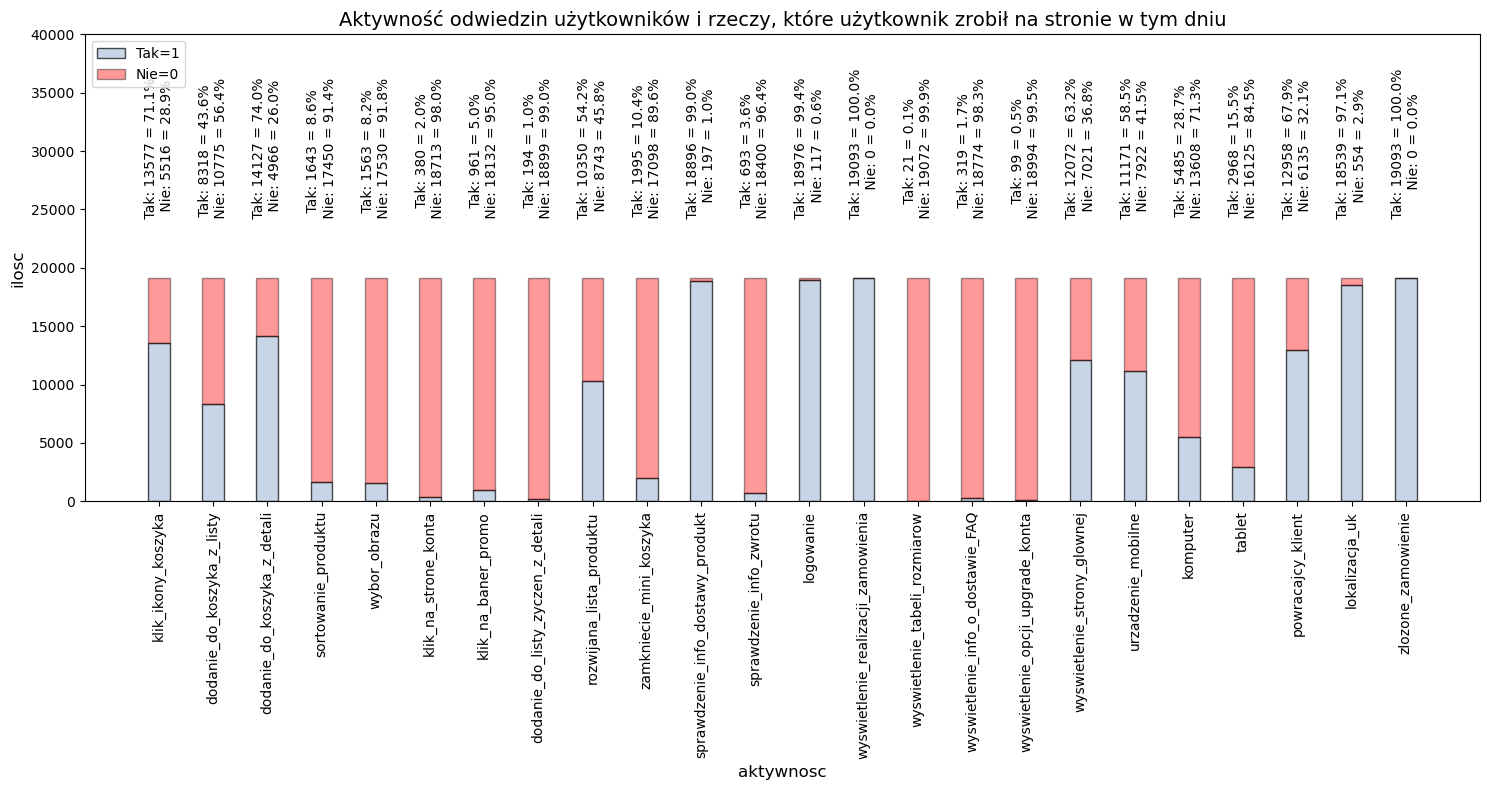

In [42]:

# Plot the bar chart
plt.figure(figsize=(15, 8))  # Adjust the figure size as needed

# Set width of bar
bar_width = 0.4

# Set position of bar on X axis
r = range(len(counts_df_zam))

# Create bars for each feature
plt.bar(r, counts_df_zam["Tak=1"], color='lightsteelblue', alpha=0.7, width=bar_width, edgecolor='black', label='Tak=1')
plt.bar(r, counts_df_zam["Nie=0"], color='r', alpha=0.4, width=bar_width, edgecolor='black', bottom=counts_df_zam["Tak=1"], label='Nie=0')

# Add labels for subcategories
for i, (yes_count, no_count) in enumerate(zip(counts_df_zam["Tak=1"], counts_df_zam["Nie=0"])):
    plt.text(i, yes_count + no_count + 5000, f' Tak: {yes_count} = {round((yes_count/(no_count+yes_count)*100),1)}% \n Nie: {no_count} = {round((no_count/(no_count+yes_count)*100),1)}%', ha='center', fontsize=10, rotation=90)

# Add xticks
plt.xlabel('aktywnosc', fontsize=12)
plt.ylabel('ilosc', fontsize=12)
plt.title('Aktywność odwiedzin użytkowników i rzeczy, które użytkownik zrobił na stronie w tym dniu', fontsize=14)
plt.xticks(r, counts_df_zam['aktywnosc'], rotation=90, fontsize=10)
plt.yticks(fontsize=10)

# Add legend
plt.legend(loc='upper left', fontsize=10)
plt.ylim(0, 40000)

# Show plot
plt.tight_layout()
plt.show()

# Sprawdzmy porzucone koszyki

Sprawdzmy jak maja sie statystyki odnosnie porzuconego koszyka

<b>dodanie_do_koszyka_z_listy - </b>

Czy odwiedzający dodał produkt do koszyka na stronie 'lista'?

<b>dodanie_do_koszyka_z_detali - </b>

Czy odwiedzający dodał produkt do koszyka ze strony szczególu produktu

In [43]:
df_pk = df_noid.copy()

In [44]:
df_pk.head()

,klik_ikony_koszyka,dodanie_do_koszyka_z_listy,dodanie_do_koszyka_z_detali,sortowanie_produktu,wybor_obrazu,klik_na_strone_konta,klik_na_baner_promo,dodanie_do_listy_zyczen_z_detali,rozwijana_lista_produktu,zamkniecie_mini_koszyka,sprawdzenie_info_dostawy_produkt,sprawdzenie_info_zwrotu,logowanie,wyswietlenie_realizacji_zamowienia,wyswietlenie_tabeli_rozmiarow,wyswietlenie_info_o_dostawie_FAQ,wyswietlenie_opcji_upgrade_konta,wyswietlenie_strony_glownej,urzadzenie_mobilne,komputer,tablet,powracajcy_klient,lokalizacja_uk,zlozone_zamowienie
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
4,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,1,1


In [45]:
df_pk.describe()

,klik_ikony_koszyka,dodanie_do_koszyka_z_listy,dodanie_do_koszyka_z_detali,sortowanie_produktu,wybor_obrazu,klik_na_strone_konta,klik_na_baner_promo,dodanie_do_listy_zyczen_z_detali,rozwijana_lista_produktu,zamkniecie_mini_koszyka,sprawdzenie_info_dostawy_produkt,sprawdzenie_info_zwrotu,logowanie,wyswietlenie_realizacji_zamowienia,wyswietlenie_tabeli_rozmiarow,wyswietlenie_info_o_dostawie_FAQ,wyswietlenie_opcji_upgrade_konta,wyswietlenie_strony_glownej,urzadzenie_mobilne,komputer,tablet,powracajcy_klient,lokalizacja_uk,zlozone_zamowienie
count,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000
mean,0.099150,0.074521,0.112916,0.036849,0.026735,0.003570,0.016208,0.003511,0.230362,0.017277,0.062874,0.009179,0.088810,0.080085,0.000389,0.005542,0.001096,0.290024,0.680706,0.194220,0.128364,0.534915,0.933224,0.041926
std,0.298864,0.262617,0.316490,0.188391,0.161307,0.059647,0.126274,0.059151,0.421065,0.130302,0.242737,0.095365,0.284469,0.271426,0.019711,0.074241,0.033084,0.453773,0.466204,0.395599,0.334495,0.498780,0.249634,0.200420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
df_pk.columns

Index(['klik_ikony_koszyka', 'dodanie_do_koszyka_z_listy',
       'dodanie_do_koszyka_z_detali', 'sortowanie_produktu', 'wybor_obrazu',
       'klik_na_strone_konta', 'klik_na_baner_promo',
       'dodanie_do_listy_zyczen_z_detali', 'rozwijana_lista_produktu',
       'zamkniecie_mini_koszyka', 'sprawdzenie_info_dostawy_produkt',
       'sprawdzenie_info_zwrotu', 'logowanie',
       'wyswietlenie_realizacji_zamowienia', 'wyswietlenie_tabeli_rozmiarow',
       'wyswietlenie_info_o_dostawie_FAQ', 'wyswietlenie_opcji_upgrade_konta',
       'wyswietlenie_strony_glownej', 'urzadzenie_mobilne', 'komputer',
       'tablet', 'powracajcy_klient', 'lokalizacja_uk', 'zlozone_zamowienie'],
      dtype='object')

In [47]:
df_pk = df_pk[(df_pk['dodanie_do_koszyka_z_listy'] == 1) | (df_pk['dodanie_do_koszyka_z_detali'] == 1)]
df_pk

,klik_ikony_koszyka,dodanie_do_koszyka_z_listy,dodanie_do_koszyka_z_detali,sortowanie_produktu,wybor_obrazu,klik_na_strone_konta,klik_na_baner_promo,dodanie_do_listy_zyczen_z_detali,rozwijana_lista_produktu,zamkniecie_mini_koszyka,sprawdzenie_info_dostawy_produkt,sprawdzenie_info_zwrotu,logowanie,wyswietlenie_realizacji_zamowienia,wyswietlenie_tabeli_rozmiarow,wyswietlenie_info_o_dostawie_FAQ,wyswietlenie_opcji_upgrade_konta,wyswietlenie_strony_glownej,urzadzenie_mobilne,komputer,tablet,powracajcy_klient,lokalizacja_uk,zlozone_zamowienie
4,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,1,1
35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
36,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
38,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0
43,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455362,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
455373,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
455375,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0
455379,1,1,1,0,1,0,0,0,1,0,1,0,1,1,0,0,0,0,0,1,0,0,1,1


In [48]:
df_pk = df_pk.reset_index(drop=True)
df_pk

,klik_ikony_koszyka,dodanie_do_koszyka_z_listy,dodanie_do_koszyka_z_detali,sortowanie_produktu,wybor_obrazu,klik_na_strone_konta,klik_na_baner_promo,dodanie_do_listy_zyczen_z_detali,rozwijana_lista_produktu,zamkniecie_mini_koszyka,sprawdzenie_info_dostawy_produkt,sprawdzenie_info_zwrotu,logowanie,wyswietlenie_realizacji_zamowienia,wyswietlenie_tabeli_rozmiarow,wyswietlenie_info_o_dostawie_FAQ,wyswietlenie_opcji_upgrade_konta,wyswietlenie_strony_glownej,urzadzenie_mobilne,komputer,tablet,powracajcy_klient,lokalizacja_uk,zlozone_zamowienie
0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,1,1
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
3,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0
4,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68616,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
68617,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
68618,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0
68619,1,1,1,0,1,0,0,0,1,0,1,0,1,1,0,0,0,0,0,1,0,0,1,1


In [49]:
df_pk.describe()

,klik_ikony_koszyka,dodanie_do_koszyka_z_listy,dodanie_do_koszyka_z_detali,sortowanie_produktu,wybor_obrazu,klik_na_strone_konta,klik_na_baner_promo,dodanie_do_listy_zyczen_z_detali,rozwijana_lista_produktu,zamkniecie_mini_koszyka,sprawdzenie_info_dostawy_produkt,sprawdzenie_info_zwrotu,logowanie,wyswietlenie_realizacji_zamowienia,wyswietlenie_tabeli_rozmiarow,wyswietlenie_info_o_dostawie_FAQ,wyswietlenie_opcji_upgrade_konta,wyswietlenie_strony_glownej,urzadzenie_mobilne,komputer,tablet,powracajcy_klient,lokalizacja_uk,zlozone_zamowienie
count,68621.000000,68621.000000,68621.000000,68621.000000,68621.000000,68621.000000,68621.000000,68621.000000,68621.000000,68621.000000,68621.000000,68621.000000,68621.000000,68621.000000,68621.000000,68621.000000,68621.000000,68621.000000,68621.000000,68621.000000,68621.000000,68621.000000,68621.000000,68621.000000
mean,0.520395,0.494557,0.749362,0.084289,0.069760,0.009166,0.051005,0.009705,0.621559,0.091197,0.304994,0.027033,0.421926,0.389531,0.000714,0.014383,0.003119,0.518354,0.658239,0.221842,0.132656,0.618688,0.953892,0.247985
std,0.499588,0.499974,0.433383,0.277823,0.254744,0.095302,0.220009,0.098038,0.485002,0.287891,0.460408,0.162179,0.493870,0.487647,0.026713,0.119066,0.055757,0.499667,0.474303,0.415488,0.339205,0.485712,0.209721,0.431846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
counts_df_pk = pd.DataFrame(index=df_pk.columns, columns=['Tak=1', 'Nie=0'])
counts_df_pk = counts_df_pk.rename_axis('aktywnosc')

# Loop through each column and calculate counts
for col in df_pk.columns:
    counts_df_pk.loc[col, 'Tak=1'] = df_pk[col].sum()
    counts_df_pk.loc[col, 'Nie=0'] = len(df_pk) - df_pk[col].sum()

counts_df_pk

,Tak=1,Nie=0
aktywnosc,,
klik_ikony_koszyka,35710,32911
dodanie_do_koszyka_z_listy,33937,34684
dodanie_do_koszyka_z_detali,51422,17199
sortowanie_produktu,5784,62837
wybor_obrazu,4787,63834
klik_na_strone_konta,629,67992
klik_na_baner_promo,3500,65121
dodanie_do_listy_zyczen_z_detali,666,67955
rozwijana_lista_produktu,42652,25969


In [51]:
counts_df_pk.reset_index(inplace=True)

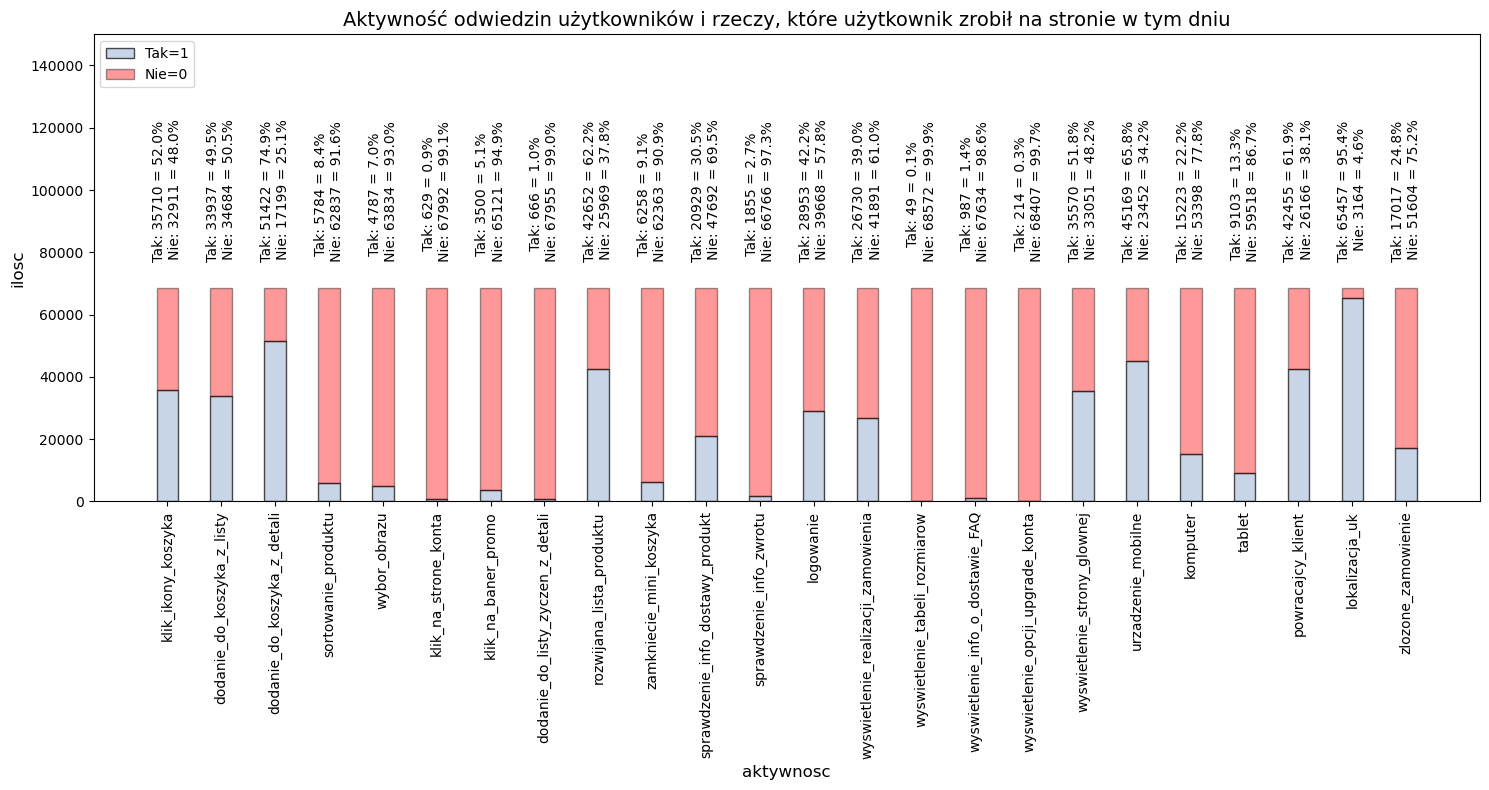

In [52]:

# Plot the bar chart
plt.figure(figsize=(15, 8))  # Adjust the figure size as needed

# Set width of bar
bar_width = 0.4

# Set position of bar on X axis
r = range(len(counts_df_pk))

# Create bars for each feature
plt.bar(r, counts_df_pk["Tak=1"], color='lightsteelblue', alpha=0.7, width=bar_width, edgecolor='black', label='Tak=1')
plt.bar(r, counts_df_pk["Nie=0"], color='r', alpha=0.4, width=bar_width, edgecolor='black', bottom=counts_df_pk["Tak=1"], label='Nie=0')

# Add labels for subcategories
for i, (yes_count, no_count) in enumerate(zip(counts_df_pk["Tak=1"], counts_df_pk["Nie=0"])):
    plt.text(i, yes_count + no_count + 5000, f'   Tak: {yes_count} = {round((yes_count/(no_count+yes_count)*100),1)}% \n   Nie: {no_count} = {round((no_count/(no_count+yes_count)*100),1)}%', ha='center', fontsize=10, rotation=90)

# Add xticks
plt.xlabel('aktywnosc', fontsize=12)
plt.ylabel('ilosc', fontsize=12)
plt.title('Aktywność odwiedzin użytkowników i rzeczy, które użytkownik zrobił na stronie w tym dniu', fontsize=14)
plt.xticks(r, counts_df_pk["aktywnosc"], rotation=90, fontsize=10)
plt.yticks(fontsize=10)

# Add legend
plt.legend(loc='upper left', fontsize=10)
plt.ylim(0, 150000)

# Show plot
plt.tight_layout()
plt.show()

Sprawdzmy samo dodanie do koszyka ze szczegolu produktu

In [53]:
df_pk_det = df_pk[(df_pk['dodanie_do_koszyka_z_detali'] == 1)]
df_pk_det

,klik_ikony_koszyka,dodanie_do_koszyka_z_listy,dodanie_do_koszyka_z_detali,sortowanie_produktu,wybor_obrazu,klik_na_strone_konta,klik_na_baner_promo,dodanie_do_listy_zyczen_z_detali,rozwijana_lista_produktu,zamkniecie_mini_koszyka,sprawdzenie_info_dostawy_produkt,sprawdzenie_info_zwrotu,logowanie,wyswietlenie_realizacji_zamowienia,wyswietlenie_tabeli_rozmiarow,wyswietlenie_info_o_dostawie_FAQ,wyswietlenie_opcji_upgrade_konta,wyswietlenie_strony_glownej,urzadzenie_mobilne,komputer,tablet,powracajcy_klient,lokalizacja_uk,zlozone_zamowienie
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
5,1,1,1,1,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,1,0,0,1,1
6,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
7,1,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68613,1,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0
68614,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
68618,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0
68619,1,1,1,0,1,0,0,0,1,0,1,0,1,1,0,0,0,0,0,1,0,0,1,1


In [54]:
df_pk_det.reset_index(drop=True)

,klik_ikony_koszyka,dodanie_do_koszyka_z_listy,dodanie_do_koszyka_z_detali,sortowanie_produktu,wybor_obrazu,klik_na_strone_konta,klik_na_baner_promo,dodanie_do_listy_zyczen_z_detali,rozwijana_lista_produktu,zamkniecie_mini_koszyka,sprawdzenie_info_dostawy_produkt,sprawdzenie_info_zwrotu,logowanie,wyswietlenie_realizacji_zamowienia,wyswietlenie_tabeli_rozmiarow,wyswietlenie_info_o_dostawie_FAQ,wyswietlenie_opcji_upgrade_konta,wyswietlenie_strony_glownej,urzadzenie_mobilne,komputer,tablet,powracajcy_klient,lokalizacja_uk,zlozone_zamowienie
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
2,1,1,1,1,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,1,0,0,1,1
3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
4,1,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51417,1,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0
51418,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
51419,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0
51420,1,1,1,0,1,0,0,0,1,0,1,0,1,1,0,0,0,0,0,1,0,0,1,1


In [55]:
df_pk_det.describe()

,klik_ikony_koszyka,dodanie_do_koszyka_z_listy,dodanie_do_koszyka_z_detali,sortowanie_produktu,wybor_obrazu,klik_na_strone_konta,klik_na_baner_promo,dodanie_do_listy_zyczen_z_detali,rozwijana_lista_produktu,zamkniecie_mini_koszyka,sprawdzenie_info_dostawy_produkt,sprawdzenie_info_zwrotu,logowanie,wyswietlenie_realizacji_zamowienia,wyswietlenie_tabeli_rozmiarow,wyswietlenie_info_o_dostawie_FAQ,wyswietlenie_opcji_upgrade_konta,wyswietlenie_strony_glownej,urzadzenie_mobilne,komputer,tablet,powracajcy_klient,lokalizacja_uk,zlozone_zamowienie
count,51422.000000,51422.000000,51422.0,51422.000000,51422.000000,51422.000000,51422.000000,51422.000000,51422.000000,51422.000000,51422.000000,51422.000000,51422.000000,51422.000000,51422.000000,51422.000000,51422.000000,51422.000000,51422.000000,51422.000000,51422.000000,51422.000000,51422.000000,51422.000000
mean,0.543075,0.325503,1.0,0.082183,0.082902,0.009840,0.054801,0.011921,0.522111,0.098518,0.337832,0.033351,0.456906,0.427541,0.000836,0.015616,0.003345,0.512777,0.656139,0.230582,0.126677,0.615554,0.954883,0.274727
std,0.498146,0.468567,0.0,0.274646,0.275737,0.098709,0.227594,0.108532,0.499516,0.298017,0.472976,0.179554,0.498144,0.494727,0.028906,0.123985,0.057739,0.499842,0.475000,0.421210,0.332614,0.486469,0.207562,0.446381
min,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,1.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
df_pk_list = df_pk[(df_pk['dodanie_do_koszyka_z_listy'] == 1)]
df_pk_list

,klik_ikony_koszyka,dodanie_do_koszyka_z_listy,dodanie_do_koszyka_z_detali,sortowanie_produktu,wybor_obrazu,klik_na_strone_konta,klik_na_baner_promo,dodanie_do_listy_zyczen_z_detali,rozwijana_lista_produktu,zamkniecie_mini_koszyka,sprawdzenie_info_dostawy_produkt,sprawdzenie_info_zwrotu,logowanie,wyswietlenie_realizacji_zamowienia,wyswietlenie_tabeli_rozmiarow,wyswietlenie_info_o_dostawie_FAQ,wyswietlenie_opcji_upgrade_konta,wyswietlenie_strony_glownej,urzadzenie_mobilne,komputer,tablet,powracajcy_klient,lokalizacja_uk,zlozone_zamowienie
0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,1,1
3,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0
4,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0
5,1,1,1,1,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,1,0,0,1,1
8,1,1,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68616,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
68617,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
68618,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0
68619,1,1,1,0,1,0,0,0,1,0,1,0,1,1,0,0,0,0,0,1,0,0,1,1


In [57]:
df_pk_list.reset_index(drop=True)

,klik_ikony_koszyka,dodanie_do_koszyka_z_listy,dodanie_do_koszyka_z_detali,sortowanie_produktu,wybor_obrazu,klik_na_strone_konta,klik_na_baner_promo,dodanie_do_listy_zyczen_z_detali,rozwijana_lista_produktu,zamkniecie_mini_koszyka,sprawdzenie_info_dostawy_produkt,sprawdzenie_info_zwrotu,logowanie,wyswietlenie_realizacji_zamowienia,wyswietlenie_tabeli_rozmiarow,wyswietlenie_info_o_dostawie_FAQ,wyswietlenie_opcji_upgrade_konta,wyswietlenie_strony_glownej,urzadzenie_mobilne,komputer,tablet,powracajcy_klient,lokalizacja_uk,zlozone_zamowienie
0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,1,1
1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0
2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0
3,1,1,1,1,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,1,0,0,1,1
4,1,1,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33932,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
33933,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
33934,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0
33935,1,1,1,0,1,0,0,0,1,0,1,0,1,1,0,0,0,0,0,1,0,0,1,1


In [58]:
df_pk_list.describe()

,klik_ikony_koszyka,dodanie_do_koszyka_z_listy,dodanie_do_koszyka_z_detali,sortowanie_produktu,wybor_obrazu,klik_na_strone_konta,klik_na_baner_promo,dodanie_do_listy_zyczen_z_detali,rozwijana_lista_produktu,zamkniecie_mini_koszyka,sprawdzenie_info_dostawy_produkt,sprawdzenie_info_zwrotu,logowanie,wyswietlenie_realizacji_zamowienia,wyswietlenie_tabeli_rozmiarow,wyswietlenie_info_o_dostawie_FAQ,wyswietlenie_opcji_upgrade_konta,wyswietlenie_strony_glownej,urzadzenie_mobilne,komputer,tablet,powracajcy_klient,lokalizacja_uk,zlozone_zamowienie
count,33937.000000,33937.0,33937.000000,33937.000000,33937.000000,33937.000000,33937.000000,33937.000000,33937.000000,33937.000000,33937.000000,33937.000000,33937.000000,33937.000000,33937.000000,33937.000000,33937.000000,33937.000000,33937.000000,33937.000000,33937.000000,33937.000000,33937.000000,33937.000000
mean,0.590653,1.0,0.493208,0.107788,0.061673,0.009665,0.059198,0.007484,0.927218,0.112827,0.289360,0.019418,0.401862,0.364823,0.000678,0.013466,0.003212,0.578218,0.652444,0.217403,0.146654,0.635884,0.949760,0.245101
std,0.491721,0.0,0.499961,0.310117,0.240564,0.097836,0.235998,0.086190,0.259782,0.316386,0.453472,0.137992,0.490282,0.481388,0.026025,0.115261,0.056583,0.493851,0.476201,0.412485,0.353766,0.481188,0.218443,0.430154
min,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,1.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Sprawdzmy czy mamy zlozone zamowienia gdzie nie dodano produktu do koszyka

In [59]:
df_pk_nk = df_noid[((df_noid['dodanie_do_koszyka_z_listy'] == 1) | (df_noid['dodanie_do_koszyka_z_detali'] == 1)) & (df_noid["zlozone_zamowienie"]==0)]
df_pk_nk

,klik_ikony_koszyka,dodanie_do_koszyka_z_listy,dodanie_do_koszyka_z_detali,sortowanie_produktu,wybor_obrazu,klik_na_strone_konta,klik_na_baner_promo,dodanie_do_listy_zyczen_z_detali,rozwijana_lista_produktu,zamkniecie_mini_koszyka,sprawdzenie_info_dostawy_produkt,sprawdzenie_info_zwrotu,logowanie,wyswietlenie_realizacji_zamowienia,wyswietlenie_tabeli_rozmiarow,wyswietlenie_info_o_dostawie_FAQ,wyswietlenie_opcji_upgrade_konta,wyswietlenie_strony_glownej,urzadzenie_mobilne,komputer,tablet,powracajcy_klient,lokalizacja_uk,zlozone_zamowienie
35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
36,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
38,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0
43,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0
50,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455359,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
455362,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
455373,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
455375,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0


In [60]:
df_pk_nk.describe()

,klik_ikony_koszyka,dodanie_do_koszyka_z_listy,dodanie_do_koszyka_z_detali,sortowanie_produktu,wybor_obrazu,klik_na_strone_konta,klik_na_baner_promo,dodanie_do_listy_zyczen_z_detali,rozwijana_lista_produktu,zamkniecie_mini_koszyka,sprawdzenie_info_dostawy_produkt,sprawdzenie_info_zwrotu,logowanie,wyswietlenie_realizacji_zamowienia,wyswietlenie_tabeli_rozmiarow,wyswietlenie_info_o_dostawie_FAQ,wyswietlenie_opcji_upgrade_konta,wyswietlenie_strony_glownej,urzadzenie_mobilne,komputer,tablet,powracajcy_klient,lokalizacja_uk,zlozone_zamowienie
count,51604.000000,51604.000000,51604.000000,51604.000000,51604.000000,51604.000000,51604.000000,51604.000000,51604.000000,51604.000000,51604.000000,51604.000000,51604.000000,51604.000000,51604.000000,51604.000000,51604.000000,51604.000000,51604.000000,51604.000000,51604.000000,51604.000000,51604.000000,51604.0
mean,0.454732,0.496454,0.722715,0.081079,0.063697,0.005581,0.049802,0.009515,0.630978,0.083986,0.078463,0.022944,0.232017,0.188222,0.000562,0.013468,0.002442,0.476068,0.684346,0.198667,0.124351,0.610360,0.947969,0.0
std,0.497951,0.499992,0.447663,0.272959,0.244214,0.074498,0.217538,0.097079,0.482545,0.277369,0.268901,0.149726,0.422124,0.390893,0.023700,0.115268,0.049353,0.499432,0.464780,0.399000,0.329985,0.487673,0.222091,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.0
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [61]:
counts_df_pk_nk = pd.DataFrame(index=df_pk_nk.columns, columns=['Tak=1', 'Nie=0'])
counts_df_pk_nk = counts_df_pk_nk.rename_axis('aktywnosc')

# Loop through each column and calculate counts
for col in df_pk_nk.columns:
    counts_df_pk_nk.loc[col, 'Tak=1'] = df_pk_nk[col].sum()
    counts_df_pk_nk.loc[col, 'Nie=0'] = len(df_pk_nk) - df_pk_nk[col].sum()

counts_df_pk_nk

,Tak=1,Nie=0
aktywnosc,,
klik_ikony_koszyka,23466,28138
dodanie_do_koszyka_z_listy,25619,25985
dodanie_do_koszyka_z_detali,37295,14309
sortowanie_produktu,4184,47420
wybor_obrazu,3287,48317
klik_na_strone_konta,288,51316
klik_na_baner_promo,2570,49034
dodanie_do_listy_zyczen_z_detali,491,51113
rozwijana_lista_produktu,32561,19043


In [62]:
counts_df_pk_nk.reset_index(inplace=True)

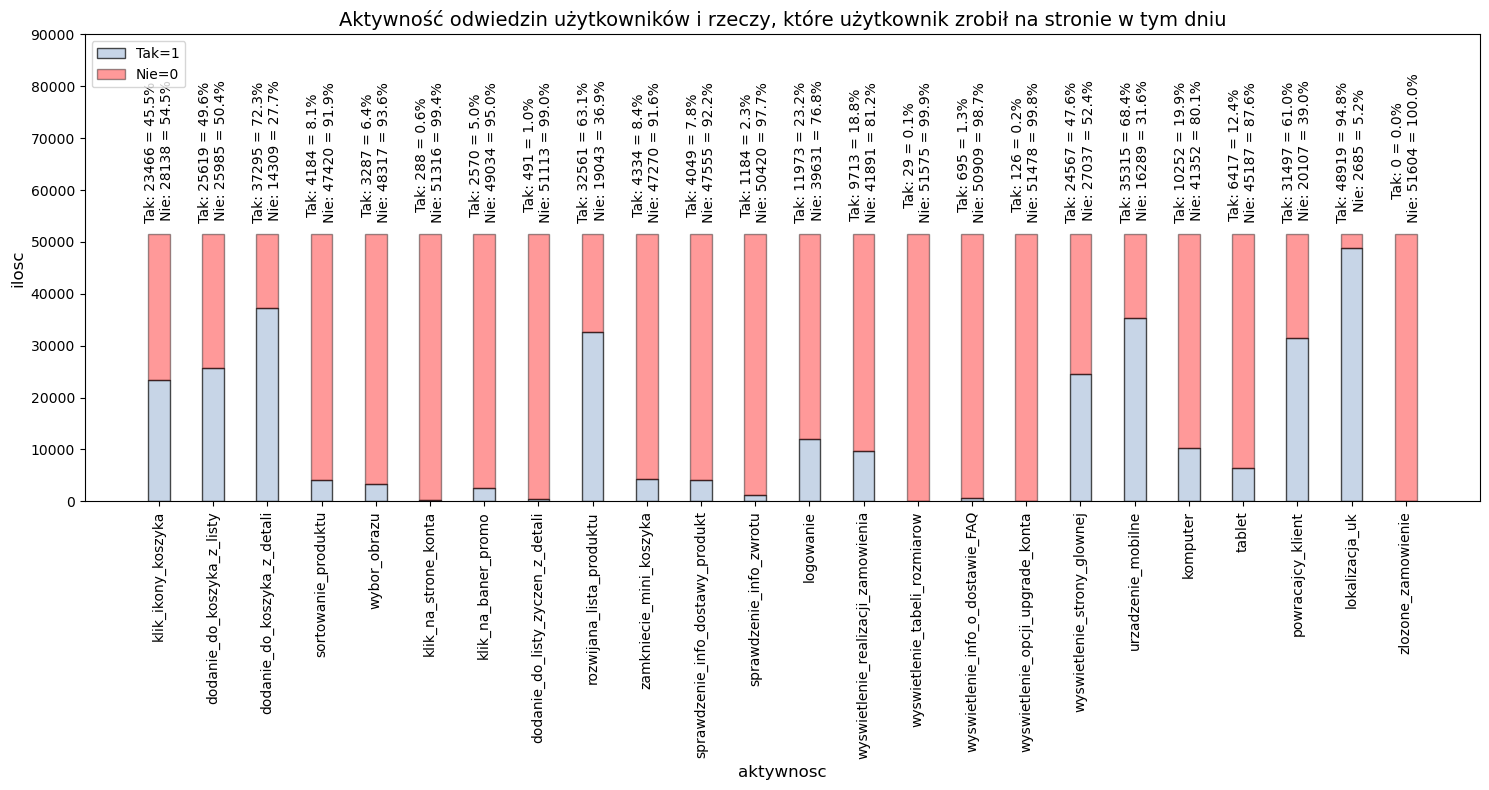

In [63]:

# Plot the bar chart
plt.figure(figsize=(15, 8))  # Adjust the figure size as needed

# Set width of bar
bar_width = 0.4

# Set position of bar on X axis
r = range(len(counts_df_pk_nk))

# Create bars for each feature
plt.bar(r, counts_df_pk_nk["Tak=1"], color='lightsteelblue', alpha=0.7, width=bar_width, edgecolor='black', label='Tak=1')
plt.bar(r, counts_df_pk_nk["Nie=0"], color='r', alpha=0.4, width=bar_width, edgecolor='black', bottom=counts_df_pk_nk["Tak=1"], label='Nie=0')

# Add labels for subcategories
for i, (yes_count, no_count) in enumerate(zip(counts_df_pk_nk["Tak=1"], counts_df_pk_nk["Nie=0"])):
    plt.text(i, yes_count + no_count + 100, f'   Tak: {yes_count} = {round((yes_count/(no_count+yes_count)*100),1)}% \n   Nie: {no_count} = {round((no_count/(no_count+yes_count)*100),1)}%', ha='center', fontsize=10, rotation=90)

# Add xticks
plt.xlabel('aktywnosc', fontsize=12)
plt.ylabel('ilosc', fontsize=12)
plt.title('Aktywność odwiedzin użytkowników i rzeczy, które użytkownik zrobił na stronie w tym dniu', fontsize=14)
plt.xticks(r, counts_df_pk_nk["aktywnosc"], rotation=90, fontsize=10)
plt.yticks(fontsize=10)

# Add legend
plt.legend(loc='upper left', fontsize=10)
plt.ylim(0, 90000)

# Show plot
plt.tight_layout()
plt.show()

Sprawdzmy powracajacego klienta

In [64]:
df_pk_klient = df_noid[(df_noid['powracajcy_klient'] == 1)]
df_pk_klient

,klik_ikony_koszyka,dodanie_do_koszyka_z_listy,dodanie_do_koszyka_z_detali,sortowanie_produktu,wybor_obrazu,klik_na_strone_konta,klik_na_baner_promo,dodanie_do_listy_zyczen_z_detali,rozwijana_lista_produktu,zamkniecie_mini_koszyka,sprawdzenie_info_dostawy_produkt,sprawdzenie_info_zwrotu,logowanie,wyswietlenie_realizacji_zamowienia,wyswietlenie_tabeli_rozmiarow,wyswietlenie_info_o_dostawie_FAQ,wyswietlenie_opcji_upgrade_konta,wyswietlenie_strony_glownej,urzadzenie_mobilne,komputer,tablet,powracajcy_klient,lokalizacja_uk,zlozone_zamowienie
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455389,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
455390,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,1,1,0
455391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
455392,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0


In [65]:
df_pk_klient.describe()

,klik_ikony_koszyka,dodanie_do_koszyka_z_listy,dodanie_do_koszyka_z_detali,sortowanie_produktu,wybor_obrazu,klik_na_strone_konta,klik_na_baner_promo,dodanie_do_listy_zyczen_z_detali,rozwijana_lista_produktu,zamkniecie_mini_koszyka,sprawdzenie_info_dostawy_produkt,sprawdzenie_info_zwrotu,logowanie,wyswietlenie_realizacji_zamowienia,wyswietlenie_tabeli_rozmiarow,wyswietlenie_info_o_dostawie_FAQ,wyswietlenie_opcji_upgrade_konta,wyswietlenie_strony_glownej,urzadzenie_mobilne,komputer,tablet,powracajcy_klient,lokalizacja_uk,zlozone_zamowienie
count,243601.000000,243601.000000,243601.000000,243601.000000,243601.000000,243601.000000,243601.000000,243601.000000,243601.000000,243601.000000,243601.000000,243601.000000,243601.000000,243601.000000,243601.000000,243601.000000,243601.000000,243601.000000,243601.000000,243601.000000,243601.000000,243601.0,243601.000000,243601.000000
mean,0.134441,0.088587,0.129938,0.038670,0.027048,0.004491,0.018465,0.004236,0.269679,0.023699,0.071806,0.008300,0.110410,0.100546,0.000263,0.005591,0.001314,0.321349,0.702949,0.173045,0.128472,1.0,0.934261,0.053194
std,0.341126,0.284148,0.336236,0.192807,0.162225,0.066864,0.134624,0.064950,0.443794,0.152109,0.258167,0.090728,0.313401,0.300727,0.016207,0.074565,0.036220,0.466996,0.456960,0.378287,0.334616,0.0,0.247825,0.224420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.0,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000


KOMORKA

In [66]:
df_pk_mobile = df_noid[(df_noid['urzadzenie_mobilne'] == 1)]
df_pk_mobile

,klik_ikony_koszyka,dodanie_do_koszyka_z_listy,dodanie_do_koszyka_z_detali,sortowanie_produktu,wybor_obrazu,klik_na_strone_konta,klik_na_baner_promo,dodanie_do_listy_zyczen_z_detali,rozwijana_lista_produktu,zamkniecie_mini_koszyka,sprawdzenie_info_dostawy_produkt,sprawdzenie_info_zwrotu,logowanie,wyswietlenie_realizacji_zamowienia,wyswietlenie_tabeli_rozmiarow,wyswietlenie_info_o_dostawie_FAQ,wyswietlenie_opcji_upgrade_konta,wyswietlenie_strony_glownej,urzadzenie_mobilne,komputer,tablet,powracajcy_klient,lokalizacja_uk,zlozone_zamowienie
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455396,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
455397,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
455398,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
455399,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [67]:
df_pk_mobile.reset_index(inplace=True)

In [68]:
df_pk_mobile.describe()

,index,klik_ikony_koszyka,dodanie_do_koszyka_z_listy,dodanie_do_koszyka_z_detali,sortowanie_produktu,wybor_obrazu,klik_na_strone_konta,klik_na_baner_promo,dodanie_do_listy_zyczen_z_detali,rozwijana_lista_produktu,zamkniecie_mini_koszyka,sprawdzenie_info_dostawy_produkt,sprawdzenie_info_zwrotu,logowanie,wyswietlenie_realizacji_zamowienia,wyswietlenie_tabeli_rozmiarow,wyswietlenie_info_o_dostawie_FAQ,wyswietlenie_opcji_upgrade_konta,wyswietlenie_strony_glownej,urzadzenie_mobilne,komputer,tablet,powracajcy_klient,lokalizacja_uk,zlozone_zamowienie
count,309994.000000,309994.000000,309994.000000,309994.000000,309994.000000,309994.000000,309994.000000,309994.000000,309994.000000,309994.000000,309994.000000,309994.000000,309994.000000,309994.000000,309994.000000,309994.000000,309994.000000,309994.000000,309994.000000,309994.0,309994.000000,309994.000000,309994.000000,309994.000000,309994.000000
mean,227764.421686,0.102466,0.071427,0.108841,0.000974,0.000713,0.005145,0.013410,0.003116,0.227769,0.017226,0.054937,0.007294,0.082356,0.073192,0.000274,0.004326,0.000926,0.273915,1.0,0.002752,0.001600,0.552395,0.948551,0.036036
std,131540.412576,0.303261,0.257537,0.311440,0.031197,0.026691,0.071546,0.115022,0.055736,0.419393,0.130113,0.227857,0.085091,0.274907,0.260451,0.016557,0.065629,0.030413,0.445967,0.0,0.052384,0.039968,0.497248,0.220913,0.186380
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,113929.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,227761.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,1.000000,1.000000,0.000000
75%,341603.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,0.000000,0.000000,1.000000,1.000000,0.000000
max,455400.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


TABLET

In [69]:
df_pk_tablet = df_noid[(df_noid['tablet'] == 1)]
df_pk_tablet

,klik_ikony_koszyka,dodanie_do_koszyka_z_listy,dodanie_do_koszyka_z_detali,sortowanie_produktu,wybor_obrazu,klik_na_strone_konta,klik_na_baner_promo,dodanie_do_listy_zyczen_z_detali,rozwijana_lista_produktu,zamkniecie_mini_koszyka,sprawdzenie_info_dostawy_produkt,sprawdzenie_info_zwrotu,logowanie,wyswietlenie_realizacji_zamowienia,wyswietlenie_tabeli_rozmiarow,wyswietlenie_info_o_dostawie_FAQ,wyswietlenie_opcji_upgrade_konta,wyswietlenie_strony_glownej,urzadzenie_mobilne,komputer,tablet,powracajcy_klient,lokalizacja_uk,zlozone_zamowienie
4,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,1,1
15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0
16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0
32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455358,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0
455363,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
455372,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
455377,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0


In [70]:
df_pk_tablet.reset_index(inplace=True)

In [71]:
df_pk_tablet.describe()

,index,klik_ikony_koszyka,dodanie_do_koszyka_z_listy,dodanie_do_koszyka_z_detali,sortowanie_produktu,wybor_obrazu,klik_na_strone_konta,klik_na_baner_promo,dodanie_do_listy_zyczen_z_detali,rozwijana_lista_produktu,zamkniecie_mini_koszyka,sprawdzenie_info_dostawy_produkt,sprawdzenie_info_zwrotu,logowanie,wyswietlenie_realizacji_zamowienia,wyswietlenie_tabeli_rozmiarow,wyswietlenie_info_o_dostawie_FAQ,wyswietlenie_opcji_upgrade_konta,wyswietlenie_strony_glownej,urzadzenie_mobilne,komputer,tablet,powracajcy_klient,lokalizacja_uk,zlozone_zamowienie
count,58457.000000,58457.000000,58457.000000,58457.000000,58457.000000,58457.000000,58457.000000,58457.00000,58457.000000,58457.000000,58457.000000,58457.000000,58457.000000,58457.000000,58457.000000,58457.000000,58457.000000,58457.000000,58457.00000,58457.000000,58457.000000,58457.0,58457.000000,58457.000000,58457.000000
mean,228179.037942,0.094463,0.085140,0.111432,0.075183,0.047950,0.000924,0.01880,0.003832,0.270096,0.030997,0.070462,0.010760,0.097388,0.089741,0.000342,0.006483,0.001249,0.27918,0.008485,0.002908,1.0,0.535368,0.968763,0.050772
std,131217.757132,0.292474,0.279092,0.314669,0.263689,0.213662,0.030380,0.13582,0.061784,0.444013,0.173311,0.255926,0.103172,0.296488,0.285813,0.018494,0.080259,0.035316,0.44860,0.091723,0.053849,0.0,0.498752,0.173958,0.219534
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000
25%,114255.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000
50%,228232.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.0,1.000000,1.000000,0.000000
75%,341917.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,1.0,1.000000,1.000000,0.000000
max,455380.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000


KOMPUTER

In [72]:
df_pk_komputer = df_noid[(df_noid['komputer'] == 1)]
df_pk_komputer

,klik_ikony_koszyka,dodanie_do_koszyka_z_listy,dodanie_do_koszyka_z_detali,sortowanie_produktu,wybor_obrazu,klik_na_strone_konta,klik_na_baner_promo,dodanie_do_listy_zyczen_z_detali,rozwijana_lista_produktu,zamkniecie_mini_koszyka,sprawdzenie_info_dostawy_produkt,sprawdzenie_info_zwrotu,logowanie,wyswietlenie_realizacji_zamowienia,wyswietlenie_tabeli_rozmiarow,wyswietlenie_info_o_dostawie_FAQ,wyswietlenie_opcji_upgrade_konta,wyswietlenie_strony_glownej,urzadzenie_mobilne,komputer,tablet,powracajcy_klient,lokalizacja_uk,zlozone_zamowienie
6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0
11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
24,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455351,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
455352,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
455354,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0
455371,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [73]:
df_pk_komputer.reset_index(inplace=True)

In [74]:
df_pk_komputer.describe()

,index,klik_ikony_koszyka,dodanie_do_koszyka_z_listy,dodanie_do_koszyka_z_detali,sortowanie_produktu,wybor_obrazu,klik_na_strone_konta,klik_na_baner_promo,dodanie_do_listy_zyczen_z_detali,rozwijana_lista_produktu,zamkniecie_mini_koszyka,sprawdzenie_info_dostawy_produkt,sprawdzenie_info_zwrotu,logowanie,wyswietlenie_realizacji_zamowienia,wyswietlenie_tabeli_rozmiarow,wyswietlenie_info_o_dostawie_FAQ,wyswietlenie_opcji_upgrade_konta,wyswietlenie_strony_glownej,urzadzenie_mobilne,komputer,tablet,powracajcy_klient,lokalizacja_uk,zlozone_zamowienie
count,88448.000000,88448.000000,88448.000000,88448.000000,88448.000000,88448.000000,88448.000000,88448.000000,88448.000000,88448.000000,88448.000000,88448.000000,88448.000000,88448.000000,88448.000000,88448.000000,88448.000000,88448.000000,88448.000000,88448.000000,88448.0,88448.000000,88448.000000,88448.000000,88448.000000
mean,227150.601382,0.098080,0.083416,0.134056,0.140297,0.106141,0.000497,0.025235,0.005257,0.219609,0.009814,0.091489,0.015241,0.115028,0.106842,0.000859,0.009373,0.001730,0.362473,0.009644,1.0,0.001922,0.476596,0.854807,0.062014
std,131348.698470,0.297425,0.276512,0.340715,0.347297,0.308020,0.022299,0.156840,0.072317,0.413984,0.098577,0.288305,0.122509,0.319058,0.308915,0.029301,0.096359,0.041555,0.480717,0.097730,0.0,0.043799,0.499455,0.352297,0.241182
min,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000
25%,113364.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,1.000000,0.000000
50%,227021.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,1.000000,0.000000
75%,341013.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,0.000000,1.000000,1.000000,0.000000
max,455379.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000


SPOZA UK

In [75]:
df_nouk = df_noid[(df_noid['lokalizacja_uk'] == 0)]
df_nouk

,klik_ikony_koszyka,dodanie_do_koszyka_z_listy,dodanie_do_koszyka_z_detali,sortowanie_produktu,wybor_obrazu,klik_na_strone_konta,klik_na_baner_promo,dodanie_do_listy_zyczen_z_detali,rozwijana_lista_produktu,zamkniecie_mini_koszyka,sprawdzenie_info_dostawy_produkt,sprawdzenie_info_zwrotu,logowanie,wyswietlenie_realizacji_zamowienia,wyswietlenie_tabeli_rozmiarow,wyswietlenie_info_o_dostawie_FAQ,wyswietlenie_opcji_upgrade_konta,wyswietlenie_strony_glownej,urzadzenie_mobilne,komputer,tablet,powracajcy_klient,lokalizacja_uk,zlozone_zamowienie
29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
40,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
44,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
45,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455327,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
455343,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
455351,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
455355,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [76]:
df_nouk.reset_index(inplace=True)

In [77]:
df_nouk.describe()

,index,klik_ikony_koszyka,dodanie_do_koszyka_z_listy,dodanie_do_koszyka_z_detali,sortowanie_produktu,wybor_obrazu,klik_na_strone_konta,klik_na_baner_promo,dodanie_do_listy_zyczen_z_detali,rozwijana_lista_produktu,zamkniecie_mini_koszyka,sprawdzenie_info_dostawy_produkt,sprawdzenie_info_zwrotu,logowanie,wyswietlenie_realizacji_zamowienia,wyswietlenie_tabeli_rozmiarow,wyswietlenie_info_o_dostawie_FAQ,wyswietlenie_opcji_upgrade_konta,wyswietlenie_strony_glownej,urzadzenie_mobilne,komputer,tablet,powracajcy_klient,lokalizacja_uk,zlozone_zamowienie
count,30410.000000,30410.000000,30410.000000,30410.000000,30410.000000,30410.000000,30410.000000,30410.000000,30410.000000,30410.000000,30410.000000,30410.000000,30410.000000,30410.000000,30410.000000,30410.000000,30410.000000,30410.00000,30410.000000,30410.000000,30410.000000,30410.000000,30410.000000,30410.0,30410.000000
mean,227819.410654,0.078461,0.056067,0.076291,0.072871,0.051858,0.003880,0.025090,0.005919,0.234002,0.009799,0.043801,0.010424,0.073002,0.062414,0.001085,0.011279,0.00148,0.406379,0.524466,0.422295,0.060046,0.526603,0.0,0.018218
std,131708.431185,0.268900,0.230055,0.265467,0.259929,0.221744,0.062172,0.156402,0.076709,0.423380,0.098507,0.204656,0.101567,0.260145,0.241909,0.032925,0.105605,0.03844,0.491165,0.499409,0.493933,0.237576,0.499300,0.0,0.133740
min,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,112577.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,228320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000,0.0,0.000000
75%,342594.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,0.000000,1.000000,0.0,0.000000
max,455392.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


### PORZUCONY KOSZYK!!! poza UK

ile osob dodaje do koszyka i nie finalizuje od razu? 

ile osob wraca na strone sprawdza koszyk i tez nie finalizuje??

In [78]:
df_nouk_pk = df_nouk [(df_nouk['dodanie_do_koszyka_z_listy'] == 1) | (df_nouk['dodanie_do_koszyka_z_detali'] == 1)]
df_nouk_pk

,index,klik_ikony_koszyka,dodanie_do_koszyka_z_listy,dodanie_do_koszyka_z_detali,sortowanie_produktu,wybor_obrazu,klik_na_strone_konta,klik_na_baner_promo,dodanie_do_listy_zyczen_z_detali,rozwijana_lista_produktu,zamkniecie_mini_koszyka,sprawdzenie_info_dostawy_produkt,sprawdzenie_info_zwrotu,logowanie,wyswietlenie_realizacji_zamowienia,wyswietlenie_tabeli_rozmiarow,wyswietlenie_info_o_dostawie_FAQ,wyswietlenie_opcji_upgrade_konta,wyswietlenie_strony_glownej,urzadzenie_mobilne,komputer,tablet,powracajcy_klient,lokalizacja_uk,zlozone_zamowienie
15,192,1,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,1,1,0,1,0,0
16,193,1,1,1,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1,1,1,0,1,0,0
17,194,1,0,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
21,288,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
34,410,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30371,454715,1,1,1,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
30379,454902,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0
30380,454917,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0
30381,454918,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0


In [79]:
df_nouk_pk.describe()

,index,klik_ikony_koszyka,dodanie_do_koszyka_z_listy,dodanie_do_koszyka_z_detali,sortowanie_produktu,wybor_obrazu,klik_na_strone_konta,klik_na_baner_promo,dodanie_do_listy_zyczen_z_detali,rozwijana_lista_produktu,zamkniecie_mini_koszyka,sprawdzenie_info_dostawy_produkt,sprawdzenie_info_zwrotu,logowanie,wyswietlenie_realizacji_zamowienia,wyswietlenie_tabeli_rozmiarow,wyswietlenie_info_o_dostawie_FAQ,wyswietlenie_opcji_upgrade_konta,wyswietlenie_strony_glownej,urzadzenie_mobilne,komputer,tablet,powracajcy_klient,lokalizacja_uk,zlozone_zamowienie
count,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.0,3164.000000
mean,227066.023704,0.520228,0.538875,0.733249,0.189001,0.152971,0.008534,0.080594,0.020860,0.658344,0.060683,0.240202,0.031922,0.385904,0.349241,0.001896,0.034134,0.003477,0.621049,0.499052,0.457965,0.075221,0.677623,0.0,0.151391
std,131958.476742,0.499670,0.498565,0.442331,0.391572,0.360016,0.091997,0.272254,0.142937,0.474340,0.238785,0.427274,0.175819,0.486885,0.476806,0.043512,0.181602,0.058870,0.485203,0.500078,0.498309,0.263790,0.467460,0.0,0.358486
min,192.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,111145.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,224604.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000
75%,341669.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.0,0.000000
max,455199.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


No Uk - nowy klient - kupil nie kupil

In [80]:
df_nouk_nk = df_noid[(df_noid['lokalizacja_uk'] == 0) & (df_noid['powracajcy_klient'] == 0)]
df_nouk_nk

,klik_ikony_koszyka,dodanie_do_koszyka_z_listy,dodanie_do_koszyka_z_detali,sortowanie_produktu,wybor_obrazu,klik_na_strone_konta,klik_na_baner_promo,dodanie_do_listy_zyczen_z_detali,rozwijana_lista_produktu,zamkniecie_mini_koszyka,sprawdzenie_info_dostawy_produkt,sprawdzenie_info_zwrotu,logowanie,wyswietlenie_realizacji_zamowienia,wyswietlenie_tabeli_rozmiarow,wyswietlenie_info_o_dostawie_FAQ,wyswietlenie_opcji_upgrade_konta,wyswietlenie_strony_glownej,urzadzenie_mobilne,komputer,tablet,powracajcy_klient,lokalizacja_uk,zlozone_zamowienie
29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
78,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
84,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
107,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455165,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
455205,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
455207,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
455255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [81]:
df_nouk_nk.describe()

,klik_ikony_koszyka,dodanie_do_koszyka_z_listy,dodanie_do_koszyka_z_detali,sortowanie_produktu,wybor_obrazu,klik_na_strone_konta,klik_na_baner_promo,dodanie_do_listy_zyczen_z_detali,rozwijana_lista_produktu,zamkniecie_mini_koszyka,sprawdzenie_info_dostawy_produkt,sprawdzenie_info_zwrotu,logowanie,wyswietlenie_realizacji_zamowienia,wyswietlenie_tabeli_rozmiarow,wyswietlenie_info_o_dostawie_FAQ,wyswietlenie_opcji_upgrade_konta,wyswietlenie_strony_glownej,urzadzenie_mobilne,komputer,tablet,powracajcy_klient,lokalizacja_uk,zlozone_zamowienie
count,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.0,14396.0,14396.000000
mean,0.037371,0.033898,0.053904,0.047861,0.042651,0.003682,0.018061,0.002570,0.140734,0.005835,0.042720,0.012295,0.051820,0.044248,0.001598,0.014657,0.000972,0.348500,0.481731,0.462906,0.057447,0.0,0.0,0.011184
std,0.189677,0.180974,0.225836,0.213478,0.202075,0.060566,0.133175,0.050633,0.347759,0.076166,0.202233,0.110203,0.221671,0.205654,0.039940,0.120179,0.031171,0.476512,0.499683,0.498639,0.232702,0.0,0.0,0.105163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.0,0.0,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000


### Klienci z UK

Sprawdzmy statystyki klientow z UK


In [84]:
df_UK = df_noid[(df_noid['lokalizacja_uk'] == 1) & (df_noid['powracajcy_klient'] == 0)]
df_UK

,klik_ikony_koszyka,dodanie_do_koszyka_z_listy,dodanie_do_koszyka_z_detali,sortowanie_produktu,wybor_obrazu,klik_na_strone_konta,klik_na_baner_promo,dodanie_do_listy_zyczen_z_detali,rozwijana_lista_produktu,zamkniecie_mini_koszyka,sprawdzenie_info_dostawy_produkt,sprawdzenie_info_zwrotu,logowanie,wyswietlenie_realizacji_zamowienia,wyswietlenie_tabeli_rozmiarow,wyswietlenie_info_o_dostawie_FAQ,wyswietlenie_opcji_upgrade_konta,wyswietlenie_strony_glownej,urzadzenie_mobilne,komputer,tablet,powracajcy_klient,lokalizacja_uk,zlozone_zamowienie
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,1,1
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455396,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
455397,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
455398,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
455399,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [85]:
df_UK.describe()

,klik_ikony_koszyka,dodanie_do_koszyka_z_listy,dodanie_do_koszyka_z_detali,sortowanie_produktu,wybor_obrazu,klik_na_strone_konta,klik_na_baner_promo,dodanie_do_listy_zyczen_z_detali,rozwijana_lista_produktu,zamkniecie_mini_koszyka,sprawdzenie_info_dostawy_produkt,sprawdzenie_info_zwrotu,logowanie,wyswietlenie_realizacji_zamowienia,wyswietlenie_tabeli_rozmiarow,wyswietlenie_info_o_dostawie_FAQ,wyswietlenie_opcji_upgrade_konta,wyswietlenie_strony_glownej,urzadzenie_mobilne,komputer,tablet,powracajcy_klient,lokalizacja_uk,zlozone_zamowienie
count,197404.000000,197404.000000,197404.000000,197404.000000,197404.000000,197404.000000,197404.000000,197404.000000,197404.000000,197404.000000,197404.000000,197404.000000,197404.000000,197404.000000,197404.000000,197404.000000,197404.000000,197404.000000,197404.000000,197404.000000,197404.000000,197404.0,197404.0,197404.000000
mean,0.060105,0.060125,0.096214,0.033799,0.025187,0.002426,0.013287,0.002685,0.188380,0.010187,0.053322,0.010035,0.064852,0.057451,0.000456,0.004818,0.000836,0.247102,0.667768,0.200756,0.133402,0.0,1.0,0.030263
std,0.237682,0.237720,0.294885,0.180711,0.156693,0.049200,0.114503,0.051746,0.391016,0.100417,0.224676,0.099672,0.246265,0.232702,0.021347,0.069241,0.028899,0.431328,0.471015,0.400567,0.340009,0.0,0.0,0.171310
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.0,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.0,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.0,1.000000


In [86]:
df_UKall = df_noid[(df_noid['lokalizacja_uk'] == 1)]
df_UKall

,klik_ikony_koszyka,dodanie_do_koszyka_z_listy,dodanie_do_koszyka_z_detali,sortowanie_produktu,wybor_obrazu,klik_na_strone_konta,klik_na_baner_promo,dodanie_do_listy_zyczen_z_detali,rozwijana_lista_produktu,zamkniecie_mini_koszyka,sprawdzenie_info_dostawy_produkt,sprawdzenie_info_zwrotu,logowanie,wyswietlenie_realizacji_zamowienia,wyswietlenie_tabeli_rozmiarow,wyswietlenie_info_o_dostawie_FAQ,wyswietlenie_opcji_upgrade_konta,wyswietlenie_strony_glownej,urzadzenie_mobilne,komputer,tablet,powracajcy_klient,lokalizacja_uk,zlozone_zamowienie
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
4,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455396,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
455397,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
455398,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
455399,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [87]:
df_UKall.describe()

,klik_ikony_koszyka,dodanie_do_koszyka_z_listy,dodanie_do_koszyka_z_detali,sortowanie_produktu,wybor_obrazu,klik_na_strone_konta,klik_na_baner_promo,dodanie_do_listy_zyczen_z_detali,rozwijana_lista_produktu,zamkniecie_mini_koszyka,sprawdzenie_info_dostawy_produkt,sprawdzenie_info_zwrotu,logowanie,wyswietlenie_realizacji_zamowienia,wyswietlenie_tabeli_rozmiarow,wyswietlenie_info_o_dostawie_FAQ,wyswietlenie_opcji_upgrade_konta,wyswietlenie_strony_glownej,urzadzenie_mobilne,komputer,tablet,powracajcy_klient,lokalizacja_uk,zlozone_zamowienie
count,424991.000000,424991.000000,424991.000000,424991.000000,424991.000000,424991.000000,424991.000000,424991.000000,424991.000000,424991.000000,424991.000000,424991.000000,424991.000000,424991.000000,424991.000000,424991.000000,424991.000000,424991.000000,424991.000000,424991.000000,424991.000000,424991.000000,424991.0,424991.000000
mean,0.100630,0.075842,0.115537,0.034271,0.024937,0.003548,0.015572,0.003339,0.230101,0.017812,0.064239,0.009090,0.089941,0.081350,0.000339,0.005132,0.001068,0.281698,0.691885,0.177900,0.133252,0.535510,1.0,0.043622
std,0.300839,0.264745,0.319669,0.181925,0.155933,0.059462,0.123813,0.057687,0.420898,0.132268,0.245179,0.094905,0.286097,0.273372,0.018404,0.071453,0.032667,0.449827,0.461715,0.382429,0.339848,0.498738,0.0,0.204253
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.0,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.0,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


### Klient wchodzi sprawdzic tylko status zamowienia 

Ile jest takich osob?

In [88]:
df_statuszamowienia = df_noid[(df_noid['wyswietlenie_realizacji_zamowienia'] == 1) & (df_noid["zlozone_zamowienie"]==0)]
df_statuszamowienia

,klik_ikony_koszyka,dodanie_do_koszyka_z_listy,dodanie_do_koszyka_z_detali,sortowanie_produktu,wybor_obrazu,klik_na_strone_konta,klik_na_baner_promo,dodanie_do_listy_zyczen_z_detali,rozwijana_lista_produktu,zamkniecie_mini_koszyka,sprawdzenie_info_dostawy_produkt,sprawdzenie_info_zwrotu,logowanie,wyswietlenie_realizacji_zamowienia,wyswietlenie_tabeli_rozmiarow,wyswietlenie_info_o_dostawie_FAQ,wyswietlenie_opcji_upgrade_konta,wyswietlenie_strony_glownej,urzadzenie_mobilne,komputer,tablet,powracajcy_klient,lokalizacja_uk,zlozone_zamowienie
74,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,1,0
104,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,1,0
183,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,0,1,1,0,0,1,1,0
184,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,0,0,1,1,0
185,0,0,0,0,0,0,0,1,0,0,1,1,1,1,0,0,1,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455252,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,1,0
455267,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,1,0
455276,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,1,1,0,0,0,1,0
455337,1,1,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,1,0,1,1,0


In [89]:
df_statuszamowienia.describe()

,klik_ikony_koszyka,dodanie_do_koszyka_z_listy,dodanie_do_koszyka_z_detali,sortowanie_produktu,wybor_obrazu,klik_na_strone_konta,klik_na_baner_promo,dodanie_do_listy_zyczen_z_detali,rozwijana_lista_produktu,zamkniecie_mini_koszyka,sprawdzenie_info_dostawy_produkt,sprawdzenie_info_zwrotu,logowanie,wyswietlenie_realizacji_zamowienia,wyswietlenie_tabeli_rozmiarow,wyswietlenie_info_o_dostawie_FAQ,wyswietlenie_opcji_upgrade_konta,wyswietlenie_strony_glownej,urzadzenie_mobilne,komputer,tablet,powracajcy_klient,lokalizacja_uk,zlozone_zamowienie
count,17378.000000,17378.000000,17378.000000,17378.000000,17378.000000,17378.000000,17378.000000,17378.000000,17378.000000,17378.000000,17378.000000,17378.000000,17378.000000,17378.0,17378.000000,17378.000000,17378.000000,17378.000000,17378.000000,17378.000000,17378.000000,17378.000000,17378.000000,17378.0
mean,0.402060,0.233801,0.452181,0.057774,0.047762,0.020025,0.039072,0.018414,0.366728,0.058637,0.172229,0.033145,0.976234,1.0,0.001036,0.022097,0.005639,0.518069,0.662792,0.228162,0.131085,0.663770,0.922661,0.0
std,0.490328,0.423259,0.497722,0.233323,0.213267,0.140091,0.193773,0.134447,0.481925,0.234951,0.377590,0.179021,0.152323,0.0,0.032168,0.147003,0.074885,0.499688,0.472770,0.419660,0.337503,0.472432,0.267137,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.0
75%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.0,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


BANER PROMO

In [90]:
df_baner = df_noid[(df_noid['klik_na_baner_promo'] == 1)]
df_baner

,klik_ikony_koszyka,dodanie_do_koszyka_z_listy,dodanie_do_koszyka_z_detali,sortowanie_produktu,wybor_obrazu,klik_na_strone_konta,klik_na_baner_promo,dodanie_do_listy_zyczen_z_detali,rozwijana_lista_produktu,zamkniecie_mini_koszyka,sprawdzenie_info_dostawy_produkt,sprawdzenie_info_zwrotu,logowanie,wyswietlenie_realizacji_zamowienia,wyswietlenie_tabeli_rozmiarow,wyswietlenie_info_o_dostawie_FAQ,wyswietlenie_opcji_upgrade_konta,wyswietlenie_strony_glownej,urzadzenie_mobilne,komputer,tablet,powracajcy_klient,lokalizacja_uk,zlozone_zamowienie
81,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0
194,1,0,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
315,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0
358,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0
504,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455055,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0
455074,0,0,1,0,1,0,1,0,0,0,1,0,1,1,0,0,0,1,0,1,0,1,1,1
455091,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
455224,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0


In [91]:
df_baner.describe()

,klik_ikony_koszyka,dodanie_do_koszyka_z_listy,dodanie_do_koszyka_z_detali,sortowanie_produktu,wybor_obrazu,klik_na_strone_konta,klik_na_baner_promo,dodanie_do_listy_zyczen_z_detali,rozwijana_lista_produktu,zamkniecie_mini_koszyka,sprawdzenie_info_dostawy_produkt,sprawdzenie_info_zwrotu,logowanie,wyswietlenie_realizacji_zamowienia,wyswietlenie_tabeli_rozmiarow,wyswietlenie_info_o_dostawie_FAQ,wyswietlenie_opcji_upgrade_konta,wyswietlenie_strony_glownej,urzadzenie_mobilne,komputer,tablet,powracajcy_klient,lokalizacja_uk,zlozone_zamowienie
count,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000,7381.0,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000
mean,0.353746,0.272185,0.381791,0.122206,0.085761,0.010297,1.0,0.018155,0.551822,0.075058,0.184528,0.029535,0.250779,0.222192,0.000542,0.019781,0.005690,0.549790,0.563203,0.302398,0.148896,0.609403,0.896626,0.130199
std,0.478164,0.445115,0.485859,0.327545,0.280029,0.100956,0.0,0.133520,0.497341,0.263502,0.387940,0.169313,0.433491,0.415748,0.023275,0.139255,0.075224,0.497548,0.496023,0.459328,0.356010,0.487917,0.304467,0.336545
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
